In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import re

In [2]:
df = pd.read_csv('df_final_1.4 - df_final_1.5.csv')

# Preprocessing

df

In [3]:
df.columns

Index(['Age', 'Annual Income', 'Occupation', 'AccountBalance', 'credit_score',
       'Gender', 'Education', 'Active_loans', 'Bank_Products', 'Fixed Deposit',
       'Tenure', 'LastMonthTrans', 'Networth', 'Married', 'Dependents',
       'Vehicle', 'House'],
      dtype='object')

In [4]:
df.shape

(500, 17)

In [5]:
#df['Bank_Products'] = df['Bank_Products'].apply(lambda x: len(x.split(',')))

In [6]:
df5=df.head(100)

In [7]:
df5.to_csv('df5.csv', index=False)

In [8]:
df.isnull().sum()

Age               0
Annual Income     0
Occupation        0
AccountBalance    0
credit_score      0
Gender            0
Education         0
Active_loans      0
Bank_Products     0
Fixed Deposit     0
Tenure            0
LastMonthTrans    0
Networth          0
Married           1
Dependents        0
Vehicle           0
House             0
dtype: int64

In [9]:
df.rename(columns={'Bank Products': 'Bank_Products', 'Fixed Deposit ': 'Fixed Deposit','Total Active loans':'Active_loans','Credit Score(in range of 300,900)':'credit_score','Transaction in last Month':'LastMonthTrans'}, inplace=True)
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000    760.000000    Male   
1     49         480000   Salaried           30000    750.000000    Male   
2     37         480000   Salaried           10000    710.000000    Male   
3     21         240000   Salaried            5000    700.000000    Male   
4     42          35000  Housewife           12500    800.000000  Female   
..   ...            ...        ...             ...           ...     ...   
495   26         223347      Other           17759    674.448695  Female   
496   29         384000   Business           31590    821.933399  Female   
497   57         362322      Other            5048    770.625315  Female   
498   62         168828      Other           15539    847.630622  Female   
499   65          61057      Other            5600    655.952893  Female   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
495   Post Graduate             1              6            No       3   
496  Under Graduate             3              4           Yes       1   
497  Under Graduate             3              2           Yes       5   
498  Under Graduate             1              1            No      34   
499        Graduate             0              6           Yes      15   

     LastMonthTrans  Networth Married  Dependents Vehicle   House  
0                33    100000     NaN           2     yes  rented  
1                23    800087     yes           3      no     own  
2                34     30000     yes           4     yes  rented  
3                25    650000      no           0      no     own  
4                56     10000     yes           3     yes     own  
..              ...       ...     ...         ...     ...     ...  
495              50    642447      no           1     yes     own  
496              35    560076      no           1      no     own  
497              55    609861      no           1      no   owned  
498              37     63006      no           2      no   owned  
499              57     16371      no           2      no   owned  

[500 rows x 17 columns]

In [10]:
mode_status = df['Married'].mode()[0]

In [11]:
def handle_nulls(row):
    if pd.isnull(row['Married']) and row['Age'] > 25:
        return mode_status
    return row['Married']

In [12]:
df['Married'] = df.apply(handle_nulls, axis=1)

In [13]:

df.isnull().sum()

Age               0
Annual Income     0
Occupation        0
AccountBalance    0
credit_score      0
Gender            0
Education         0
Active_loans      0
Bank_Products     0
Fixed Deposit     0
Tenure            0
LastMonthTrans    0
Networth          0
Married           0
Dependents        0
Vehicle           0
House             0
dtype: int64

In [14]:
df.dtypes

Age                 int64
Annual Income       int64
Occupation         object
AccountBalance      int64
credit_score      float64
Gender             object
Education          object
Active_loans        int64
Bank_Products       int64
Fixed Deposit      object
Tenure              int64
LastMonthTrans      int64
Networth            int64
Married            object
Dependents          int64
Vehicle            object
House              object
dtype: object

In [15]:
#df['Annual Income'] = df['Annual Income'].astype(str).str.replace(',', '').astype(int)


In [16]:
#df['AccountBalance'] = df['AccountBalance'].str.replace(',', '').astype(int)

In [17]:
describe_df=df.describe()

In [18]:
df.dtypes

Age                 int64
Annual Income       int64
Occupation         object
AccountBalance      int64
credit_score      float64
Gender             object
Education          object
Active_loans        int64
Bank_Products       int64
Fixed Deposit      object
Tenure              int64
LastMonthTrans      int64
Networth            int64
Married            object
Dependents          int64
Vehicle            object
House              object
dtype: object

In [19]:
columns_to_format = ['Active_loans', 'Networth','Annual Income','AccountBalance']
for col in columns_to_format:
    if describe_df[col].dtype in ['float64', 'int64']:
        describe_df[col] = describe_df[col].apply(lambda x: f'{x:.6f}')

In [20]:
describe_df

Age   Annual Income  AccountBalance  credit_score Active_loans  \
count  500.000000      500.000000      500.000000    500.000000   500.000000   
mean    46.918000   487362.078000   132294.222000    707.296068     1.468000   
std     13.710844   678628.300432   309719.499733     91.237042     1.172914   
min     18.000000        0.000000        0.000000    300.000000     0.000000   
25%     35.000000   191558.250000    10669.000000    641.396030     0.000000   
50%     48.000000   366916.500000    24072.500000    713.596800     2.000000   
75%     59.000000   532500.000000    94266.500000    777.644713     3.000000   
max     75.000000  9876012.000000  3000000.000000    850.000000     5.000000   

       Bank_Products      Tenure  LastMonthTrans         Networth  Dependents  
count     500.000000  500.000000      500.000000       500.000000  500.000000  
mean        3.282000   14.624000       35.770000   1366561.998000    1.798000  
std         1.715915   11.360843       14.605881   2086729.177271    1.478366  
min         1.000000    1.000000        4.000000         0.000000    0.000000  
25%         2.000000    5.000000       24.000000    334853.000000    1.000000  
50%         3.000000   12.000000       36.000000    653504.500000    2.000000  
75%         5.000000   22.000000       47.250000   1682849.000000    3.000000  
max         6.000000   50.000000       70.000000  30000000.000000    8.000000

# Age 

In [21]:
df['Age'].mean()

46.918

In [22]:
df['Age'].describe()

count    500.000000
mean      46.918000
std       13.710844
min       18.000000
25%       35.000000
50%       48.000000
75%       59.000000
max       75.000000
Name: Age, dtype: float64

<Axes: >

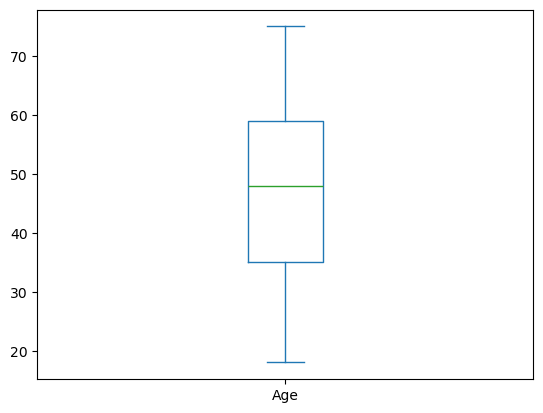

In [23]:
df['Age'].plot(kind='box')


In [24]:
#df['Age'] = np.where((df['Age'] < 18) | (df['Age'] > 70), mean_value, df['Annual Income'])

<Axes: >

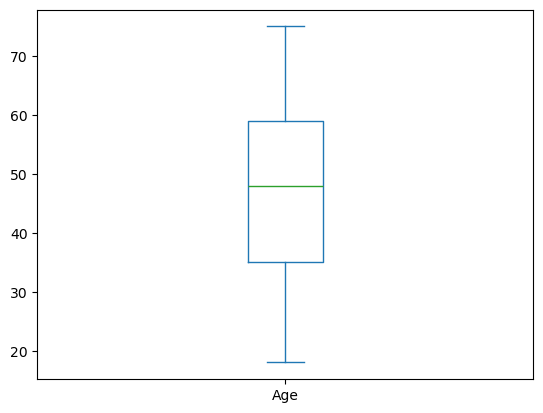

In [25]:
df['Age'].plot(kind='box')

<Axes: ylabel='Frequency'>

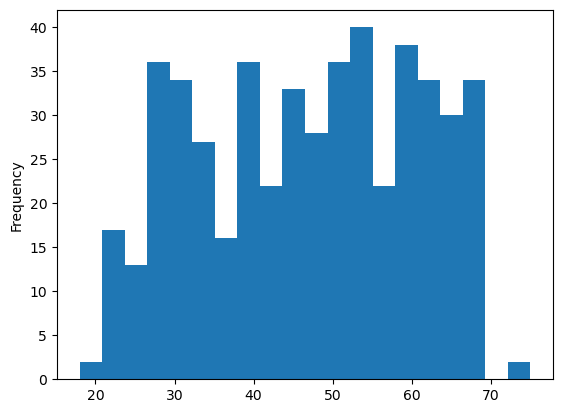

In [26]:
df['Age'].plot(kind='hist',bins=20)

In [27]:
df['Age'].value_counts()


Age
59    17
50    16
62    16
55    15
53    14
65    14
40    14
30    14
68    14
38    13
46    13
28    13
27    12
21    12
45    12
58    11
56    11
31    11
29    11
49    11
35    11
57    11
54    11
67    11
61    10
52    10
51    10
26    10
60    10
32     9
43     9
39     9
66     9
69     9
48     9
36     9
34     8
33     8
44     8
42     8
47     8
63     8
37     7
64     7
41     5
22     3
23     2
25     2
75     2
20     1
18     1
24     1
Name: count, dtype: int64

In [28]:
df['Annual Income'].mean()

487362.078

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18572\2509096820.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],bins=6)
C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

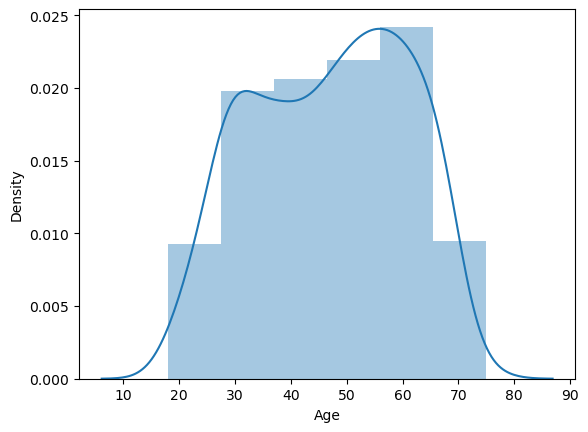

In [29]:
sns.distplot(df['Age'],bins=6)

# Occupation

In [30]:
df['Occupation'].value_counts()

Occupation
Salaried     170
Other        139
Business     129
Housewife     62
Name: count, dtype: int64

In [31]:
df['Occupation'] = df['Occupation'].replace('Salaried ', 'Salaried')

In [32]:
df['Fixed Deposit'].value_counts()

Fixed Deposit
Yes    271
No     229
Name: count, dtype: int64

In [33]:
df['Fixed Deposit'] = df['Fixed Deposit'].replace('no', 'No')

In [34]:
df['Occupation']

0       Salaried
1       Salaried
2       Salaried
3       Salaried
4      Housewife
         ...    
495        Other
496     Business
497        Other
498        Other
499        Other
Name: Occupation, Length: 500, dtype: object

In [35]:
# Find rows where 'Occupation' is 'Salaried, Other'
rows_with_salaried_other = df[df['Occupation'] == 'Salaried, Other']

# Display the result
print(rows_with_salaried_other)

Empty DataFrame
Columns: [Age, Annual Income, Occupation, AccountBalance, credit_score, Gender, Education, Active_loans, Bank_Products, Fixed Deposit, Tenure, LastMonthTrans, Networth, Married, Dependents, Vehicle, House]
Index: []


In [36]:
df.head(34)

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0    45         500100   Salaried           50000     760.00000    Male   
1    49         480000   Salaried           30000     750.00000    Male   
2    37         480000   Salaried           10000     710.00000    Male   
3    21         240000   Salaried            5000     700.00000    Male   
4    42          35000  Housewife           12500     800.00000  Female   
5    37         100000   Business          200000     800.00000  Female   
6    54         480000   Business          100000     750.00000    Male   
7    49        1230000   Salaried          120000     720.00000    Male   
8    21         300000      Other            5000     740.00000    Male   
9    21              0      Other            8000     850.00000    Male   
10   22          10000      Other            5469     720.00000    Male   
11   49         840000   Business           30000     750.00000    Male   
12   45         600000   Business           40000     710.00000  Female   
13   51        1000000   Business          500000     690.00000    Male   
14   23         400000   Salaried          100000     719.00000  Female   
15   26         600000      Other           10000     640.00000  Female   
16   21         120000   Salaried          200000     750.00000    Male   
17   21         350000   Business          400000     700.00000    Male   
18   21              0      Other            4000     589.09375    Male   
19   40        1200000   Salaried           50000     589.09375    Male   
20   60         530000   Salaried          342000     589.09375    Male   
21   25        2400000   Salaried           10000     589.09375  Female   
22   31         480000   Business          500000     400.00000    Male   
23   42         840000   Business          120000     798.00000    Male   
24   45         420000   Salaried          200000     589.09375    Male   
25   59         720000   Salaried         2000000     700.00000    Male   
26   33         600000      Other            2000     700.00000  Female   
27   23         240000   Salaried            2000     589.09375  Female   
28   38        1200000   Business         2500000     367.00000    Male   
29   60         840000   Salaried         1800000     355.00000    Male   
30   75          24000      Other         3000000     589.09375    Male   
31   26         444000   Salaried          400000     300.00000  Female   
32   50         180000      Other          100000     589.09375    Male   
33   18              0      Other            2000     589.09375    Male   

         Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0         Graduate             2              5            No      11   
1         Graduate             2              3           Yes      10   
2   Under Graduate             0              2           Yes       6   
3   Under Graduate             1              2            No       2   
4         Graduate             1              2           Yes       8   
5         Graduate             3              5           Yes      10   
6   Under Graduate             0              1            No      11   
7         Graduate             0              3            No      14   
8   Under Graduate             2              4           Yes       3   
9   Under Graduate             3              2            No       2   
10  Under Graduate             0              1            No       4   
11        Graduate             2              1           Yes      12   
12        Graduate             0              2           Yes      10   
13        Graduate             1              5           Yes      20   
14   Post Graduate             0              3           Yes       5   
15        Graduate             0              1           Yes       5   
16  Under Graduate             0              1           Yes       2   
17   Post Graduate             2              1           Yes   

In [37]:
df['Occupation'] = df['Occupation'].replace('Salaried, Other', 'Other')

In [38]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000    760.000000    Male   
1     49         480000   Salaried           30000    750.000000    Male   
2     37         480000   Salaried           10000    710.000000    Male   
3     21         240000   Salaried            5000    700.000000    Male   
4     42          35000  Housewife           12500    800.000000  Female   
..   ...            ...        ...             ...           ...     ...   
495   26         223347      Other           17759    674.448695  Female   
496   29         384000   Business           31590    821.933399  Female   
497   57         362322      Other            5048    770.625315  Female   
498   62         168828      Other           15539    847.630622  Female   
499   65          61057      Other            5600    655.952893  Female   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
495   Post Graduate             1              6            No       3   
496  Under Graduate             3              4           Yes       1   
497  Under Graduate             3              2           Yes       5   
498  Under Graduate             1              1            No      34   
499        Graduate             0              6           Yes      15   

     LastMonthTrans  Networth Married  Dependents Vehicle   House  
0                33    100000     yes           2     yes  rented  
1                23    800087     yes           3      no     own  
2                34     30000     yes           4     yes  rented  
3                25    650000      no           0      no     own  
4                56     10000     yes           3     yes     own  
..              ...       ...     ...         ...     ...     ...  
495              50    642447      no           1     yes     own  
496              35    560076      no           1      no     own  
497              55    609861      no           1      no   owned  
498              37     63006      no           2      no   owned  
499              57     16371      no           2      no   owned  

[500 rows x 17 columns]

In [39]:
df['Occupation'].value_counts()

Occupation
Salaried     170
Other        139
Business     129
Housewife     62
Name: count, dtype: int64

In [40]:
df['Occupation'] = df['Occupation'].replace('Salaried, Other', 'Other')


<Axes: xlabel='Occupation'>

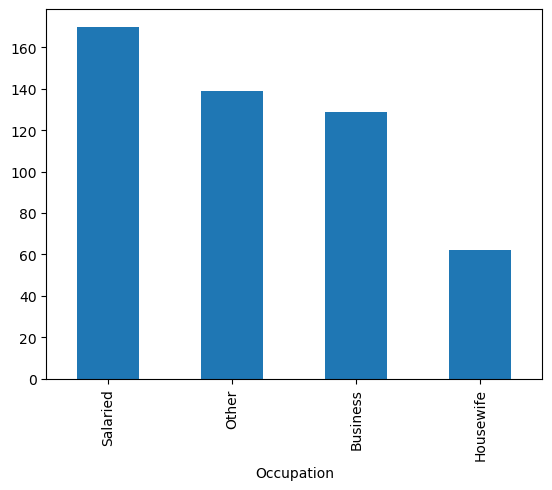

In [41]:
df['Occupation'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

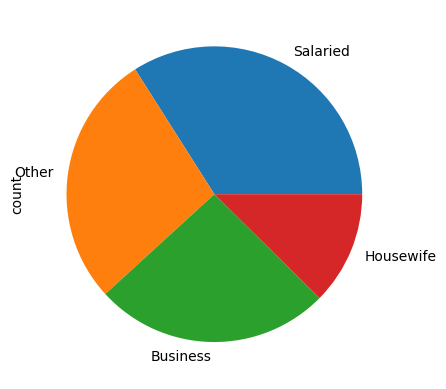

In [42]:
df['Occupation'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

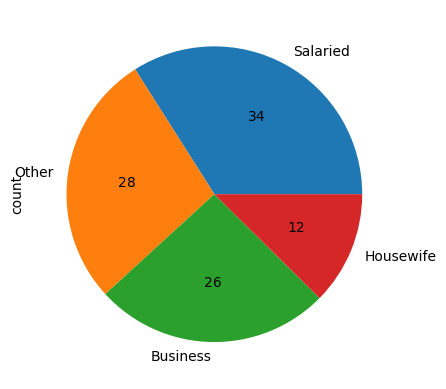

In [43]:
df['Occupation'].value_counts().plot(kind='pie',autopct='%.f')

# MaritalStatus

# Gender	

In [44]:
df['Gender'].value_counts()

Gender
Male      271
Female    229
Name: count, dtype: int64

In [45]:
df['Gender'] = df['Gender'].replace('Female ', 'Female')

In [46]:
df['Gender'].value_counts()

Gender
Male      271
Female    229
Name: count, dtype: int64

<Axes: xlabel='Gender'>

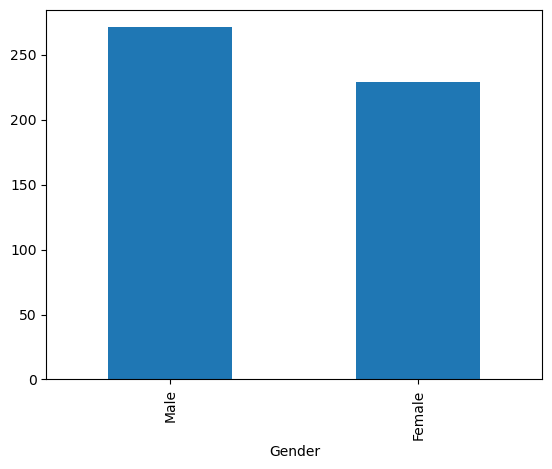

In [47]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

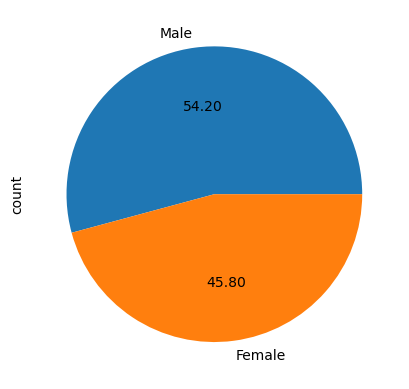

In [48]:
df['Gender'].value_counts().plot(kind='pie',autopct='%.2f')

In [49]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000    760.000000    Male   
1     49         480000   Salaried           30000    750.000000    Male   
2     37         480000   Salaried           10000    710.000000    Male   
3     21         240000   Salaried            5000    700.000000    Male   
4     42          35000  Housewife           12500    800.000000  Female   
..   ...            ...        ...             ...           ...     ...   
495   26         223347      Other           17759    674.448695  Female   
496   29         384000   Business           31590    821.933399  Female   
497   57         362322      Other            5048    770.625315  Female   
498   62         168828      Other           15539    847.630622  Female   
499   65          61057      Other            5600    655.952893  Female   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
495   Post Graduate             1              6            No       3   
496  Under Graduate             3              4           Yes       1   
497  Under Graduate             3              2           Yes       5   
498  Under Graduate             1              1            No      34   
499        Graduate             0              6           Yes      15   

     LastMonthTrans  Networth Married  Dependents Vehicle   House  
0                33    100000     yes           2     yes  rented  
1                23    800087     yes           3      no     own  
2                34     30000     yes           4     yes  rented  
3                25    650000      no           0      no     own  
4                56     10000     yes           3     yes     own  
..              ...       ...     ...         ...     ...     ...  
495              50    642447      no           1     yes     own  
496              35    560076      no           1      no     own  
497              55    609861      no           1      no   owned  
498              37     63006      no           2      no   owned  
499              57     16371      no           2      no   owned  

[500 rows x 17 columns]

# Married

In [50]:
df['Married'].value_counts()

Married
yes    284
no     216
Name: count, dtype: int64

<Axes: xlabel='Married'>

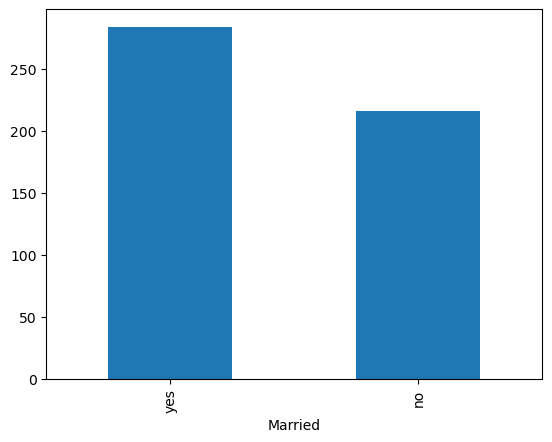

In [51]:
df['Married'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

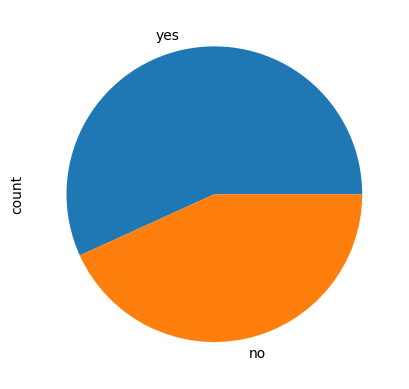

In [52]:
df['Married'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

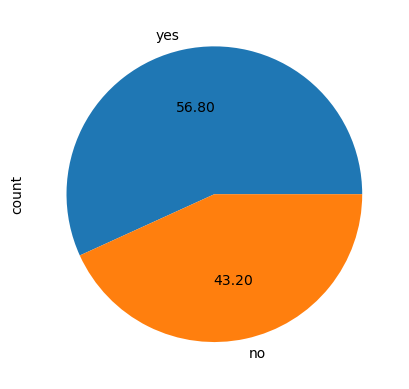

In [53]:
df['Married'].value_counts().plot(kind='pie',autopct='%.2f')

# Education

In [54]:
df['Education'].value_counts()

Education
Graduate          185
Under Graduate    161
Post Graduate     154
Name: count, dtype: int64

In [55]:
df['Education'] = df['Education'].replace('Graduate ', 'Graduate')
df['Education'] = df['Education'].replace('UnderGraduate', 'Under Graduate')

In [56]:
df['Education'].value_counts()


Education
Graduate          185
Under Graduate    161
Post Graduate     154
Name: count, dtype: int64

In [57]:
df.shape

(500, 17)

<Axes: xlabel='Education'>

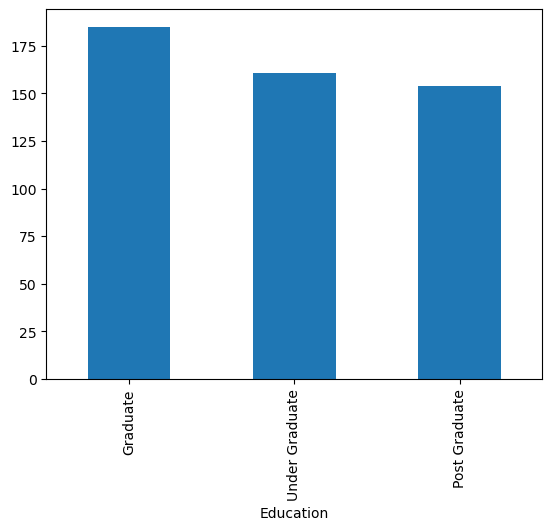

In [58]:
df['Education'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

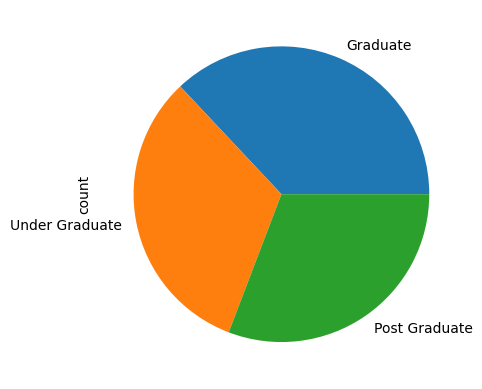

In [59]:
df['Education'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

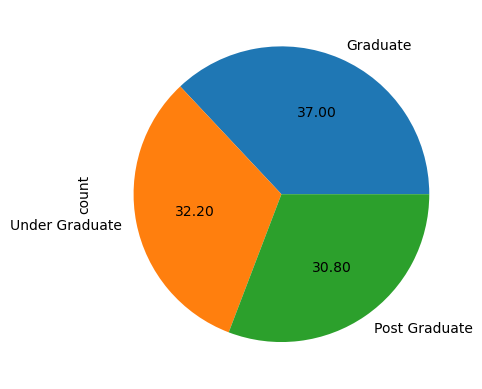

In [60]:
df['Education'].value_counts().plot(kind='pie',autopct='%.2f')

# Active_loans	

In [61]:
df['Active_loans'].value_counts()

Active_loans
0    147
3    125
2    124
1    102
4      1
5      1
Name: count, dtype: int64

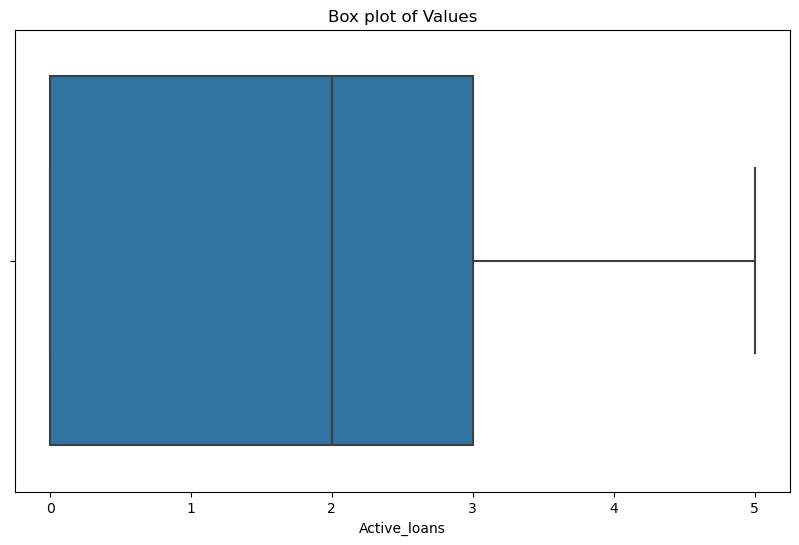

In [62]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Active_loans'])
plt.title('Box plot of Values')
plt.show()


In [63]:
df.shape

(500, 17)

In [64]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Active_loans'].quantile(0.25)
Q3 = df['Active_loans'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Active_loans'] < lower_bound) | (df['Active_loans'] > upper_bound)]

print("Outliers:\n", outliers)


Outliers:
 Empty DataFrame
Columns: [Age, Annual Income, Occupation, AccountBalance, credit_score, Gender, Education, Active_loans, Bank_Products, Fixed Deposit, Tenure, LastMonthTrans, Networth, Married, Dependents, Vehicle, House]
Index: []


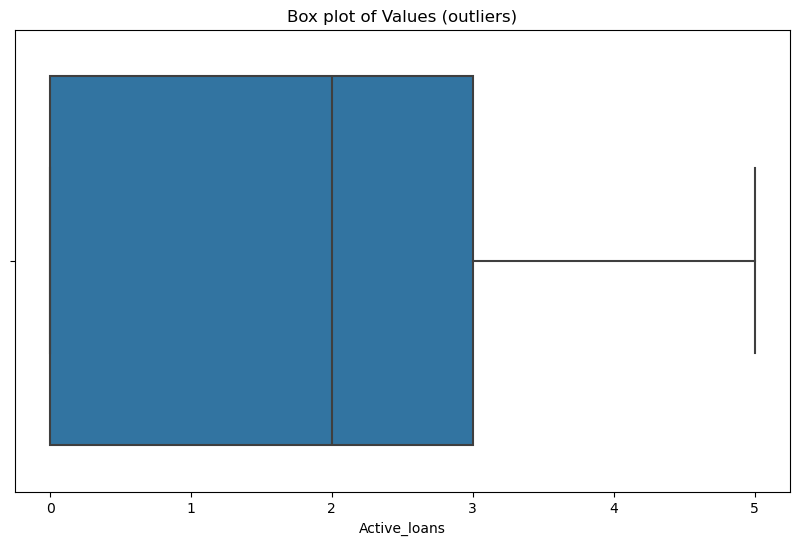

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Active_loans'])
plt.title('Box plot of Values (outliers)')
plt.show()

In [66]:
mode_value = df['Active_loans'].mode()[0]


In [67]:
def replace_outliers(series, lower_bound, upper_bound, mode_value):
    return np.where((series < lower_bound) | (series > upper_bound), mode_value, series)


In [68]:
df['Active_loans'] = replace_outliers(df['Active_loans'], lower_bound, upper_bound, mode_value)

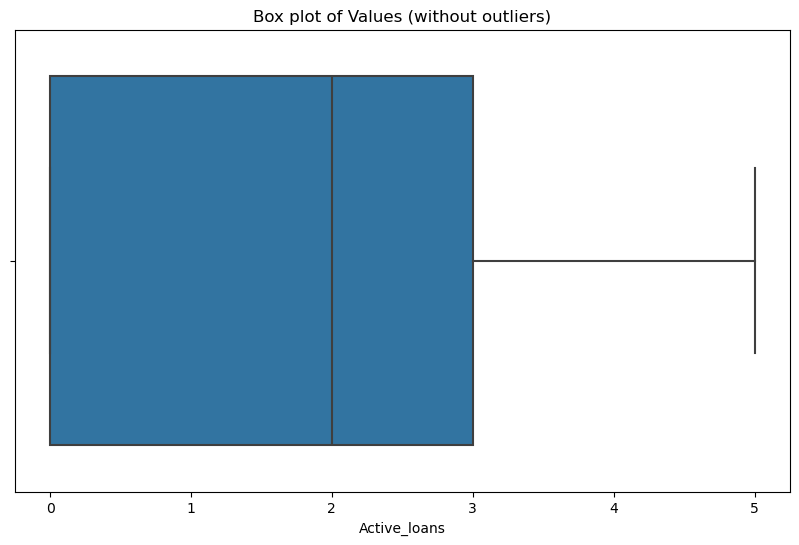

In [69]:
# Create a box plot for the cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Active_loans'])
plt.title('Box plot of Values (without outliers)')
plt.show()


<Axes: xlabel='Active_loans'>

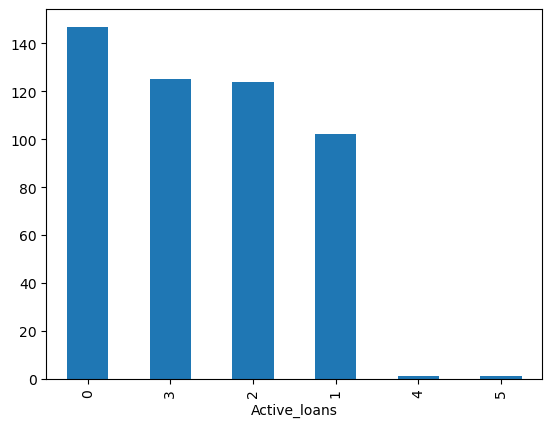

In [70]:
df['Active_loans'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

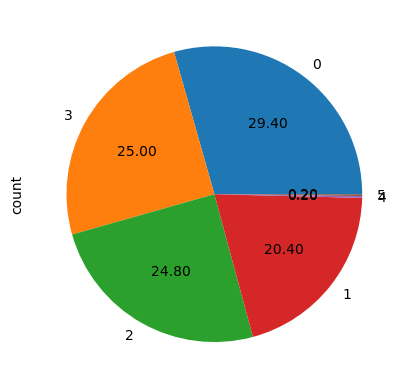

In [71]:
df['Active_loans'].value_counts().plot(kind='pie',autopct='%.2f')

# Bank_Products

In [72]:
df['Bank_Products'].value_counts()

Bank_Products
1    105
4     90
2     87
3     80
6     72
5     66
Name: count, dtype: int64

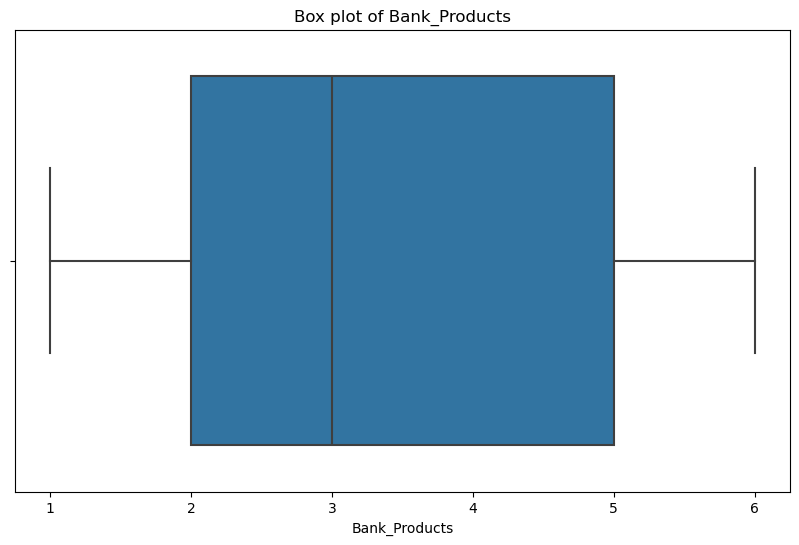

In [73]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Bank_Products'])
plt.title('Box plot of Bank_Products')
plt.show()


<Axes: xlabel='Bank_Products'>

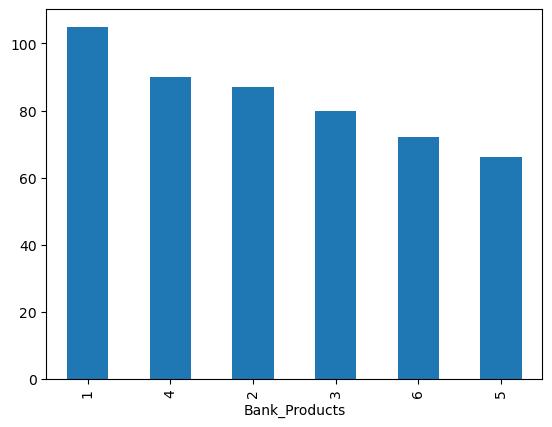

In [74]:
df['Bank_Products'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

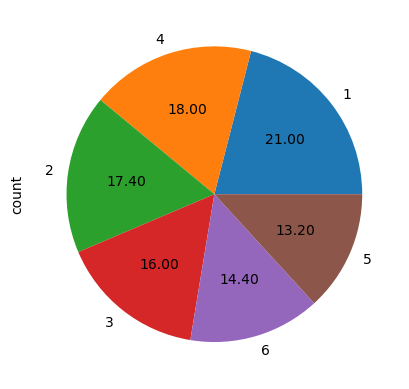

In [75]:
df['Bank_Products'].value_counts().plot(kind='pie',autopct='%.2f')

# Dependents

In [76]:
df['Dependents'].value_counts()

Dependents
2    128
0    122
1    103
3     74
4     55
5     13
6      3
7      1
8      1
Name: count, dtype: int64

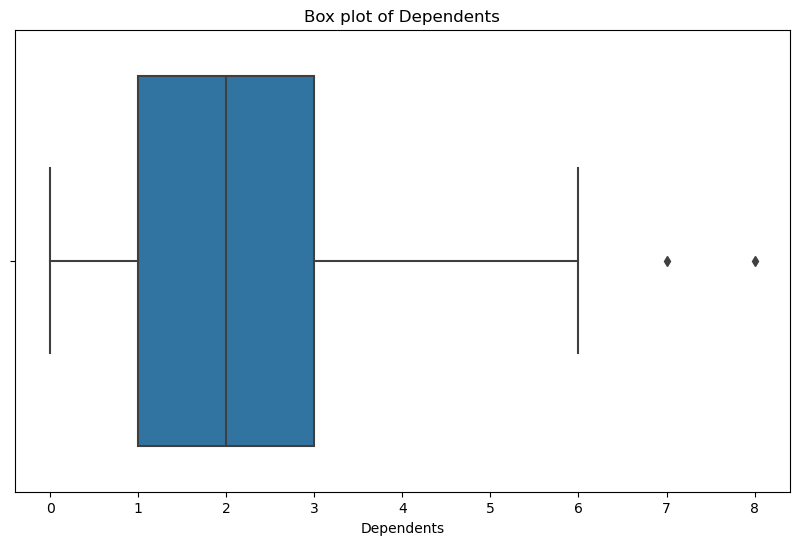

In [77]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Dependents'])
plt.title('Box plot of Dependents')
plt.show()


<Axes: xlabel='Dependents'>

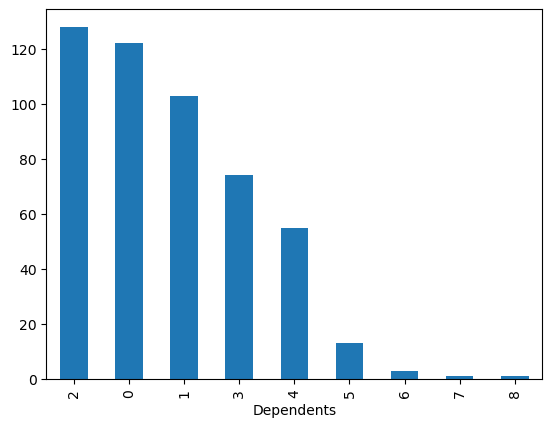

In [78]:
df['Dependents'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

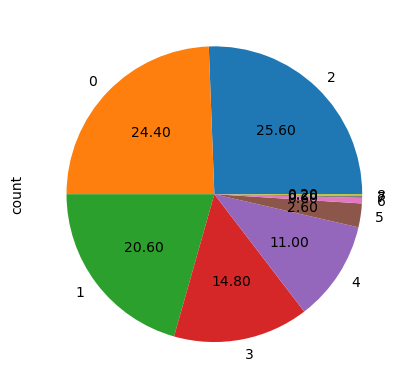

In [79]:
df['Dependents'].value_counts().plot(kind='pie',autopct='%.2f')

# Fixed Deposit	

In [80]:
df['Fixed Deposit'].value_counts()

Fixed Deposit
Yes    271
No     229
Name: count, dtype: int64

In [81]:
df['Fixed Deposit'] = df['Fixed Deposit'].replace('Yes, No', 'Yes')

In [82]:
df['Fixed Deposit'].value_counts()

Fixed Deposit
Yes    271
No     229
Name: count, dtype: int64

<Axes: xlabel='Fixed Deposit'>

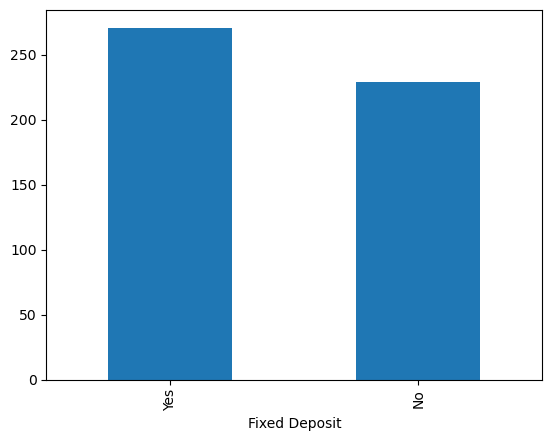

In [83]:
df['Fixed Deposit'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

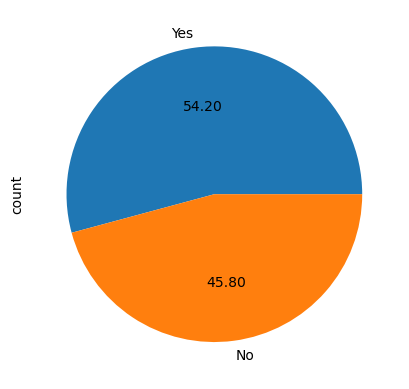

In [84]:
df['Fixed Deposit'].value_counts().plot(kind='pie',autopct='%.2f')

In [85]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000    760.000000    Male   
1     49         480000   Salaried           30000    750.000000    Male   
2     37         480000   Salaried           10000    710.000000    Male   
3     21         240000   Salaried            5000    700.000000    Male   
4     42          35000  Housewife           12500    800.000000  Female   
..   ...            ...        ...             ...           ...     ...   
495   26         223347      Other           17759    674.448695  Female   
496   29         384000   Business           31590    821.933399  Female   
497   57         362322      Other            5048    770.625315  Female   
498   62         168828      Other           15539    847.630622  Female   
499   65          61057      Other            5600    655.952893  Female   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
495   Post Graduate             1              6            No       3   
496  Under Graduate             3              4           Yes       1   
497  Under Graduate             3              2           Yes       5   
498  Under Graduate             1              1            No      34   
499        Graduate             0              6           Yes      15   

     LastMonthTrans  Networth Married  Dependents Vehicle   House  
0                33    100000     yes           2     yes  rented  
1                23    800087     yes           3      no     own  
2                34     30000     yes           4     yes  rented  
3                25    650000      no           0      no     own  
4                56     10000     yes           3     yes     own  
..              ...       ...     ...         ...     ...     ...  
495              50    642447      no           1     yes     own  
496              35    560076      no           1      no     own  
497              55    609861      no           1      no   owned  
498              37     63006      no           2      no   owned  
499              57     16371      no           2      no   owned  

[500 rows x 17 columns]

# credit_score

In [86]:
df['credit_score'].value_counts()

credit_score
589.093750    20
700.000000    12
750.000000    11
720.000000     4
800.000000     3
              ..
758.309577     1
641.152939     1
665.548595     1
622.133801     1
655.952893     1
Name: count, Length: 448, dtype: int64

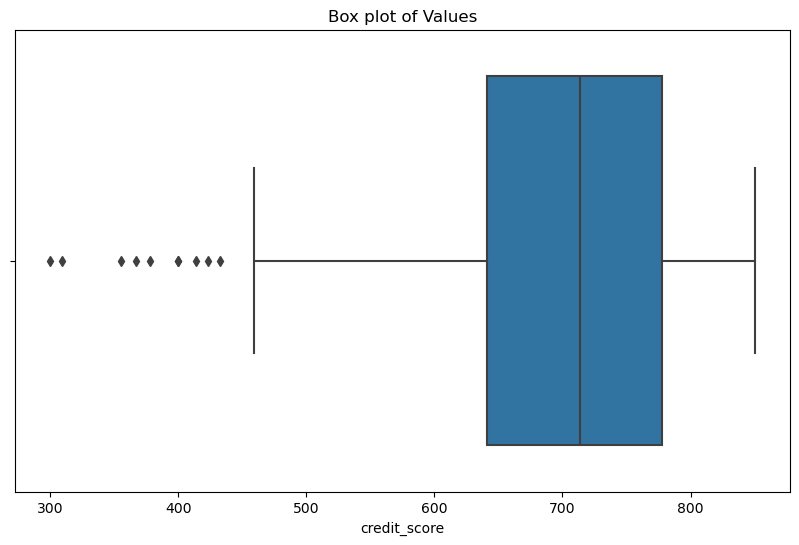

In [87]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['credit_score'])
plt.title('Box plot of Values')
plt.show()


In [88]:
df['credit_score'].describe()

count    500.000000
mean     707.296068
std       91.237042
min      300.000000
25%      641.396030
50%      713.596800
75%      777.644713
max      850.000000
Name: credit_score, dtype: float64

In [89]:
mean_value = df[(df['credit_score'] >= 300) & (df['credit_score'] <= 850)]['credit_score'].mean()


In [90]:
outliers = df[(df['credit_score'] < 300) | (df['credit_score'] > 850)]
print("Outliers:\n", outliers)


Outliers:
 Empty DataFrame
Columns: [Age, Annual Income, Occupation, AccountBalance, credit_score, Gender, Education, Active_loans, Bank_Products, Fixed Deposit, Tenure, LastMonthTrans, Networth, Married, Dependents, Vehicle, House]
Index: []


In [91]:
df['credit_score'] = np.where((df['credit_score'] < 300) | (df['credit_score'] > 850), mean_value, df['credit_score'])

In [92]:
df['credit_score'].value_counts()


credit_score
589.093750    20
700.000000    12
750.000000    11
720.000000     4
800.000000     3
              ..
758.309577     1
641.152939     1
665.548595     1
622.133801     1
655.952893     1
Name: count, Length: 448, dtype: int64

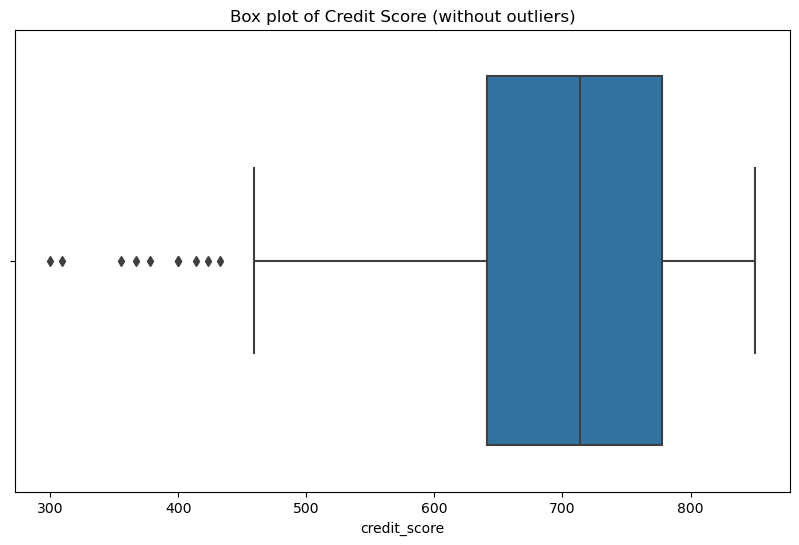

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['credit_score'])
plt.title('Box plot of Credit Score (without outliers)')
plt.show()

In [94]:
df['credit_score'].describe()


count    500.000000
mean     707.296068
std       91.237042
min      300.000000
25%      641.396030
50%      713.596800
75%      777.644713
max      850.000000
Name: credit_score, dtype: float64

In [95]:
df.shape

(500, 17)

# Annual Income	

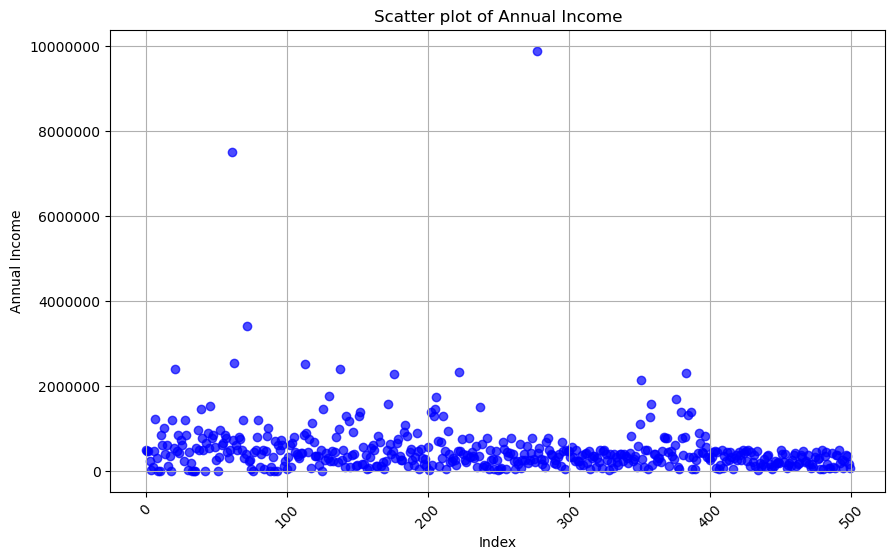

In [96]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['Annual Income'], color='blue', alpha=0.7)
plt.title('Scatter plot of Annual Income')
plt.xlabel('Index')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

In [97]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Annual Income'].quantile(0.25)
Q3 = df['Annual Income'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Annual Income'] < lower_bound) | (df['Annual Income'] > upper_bound)]

print("Outliers:\n", outliers)

Outliers:
      Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
7     49        1230000   Salaried          120000    720.000000    Male   
19    40        1200000   Salaried           50000    589.093750    Male   
21    25        2400000   Salaried           10000    589.093750  Female   
28    38        1200000   Business         2500000    367.000000    Male   
39    28        1452000   Salaried          400543    700.000000    Male   
46    52        1520000   Salaried           40000    700.000000  Female   
61    29        7500000   Salaried          450560    423.000000  Female   
63    24        2550000      Other           30000    400.000000  Female   
69    43        1200000   Business          670000    689.000000  Female   
72    30        3400000   Salaried           45000    786.000000    Male   
80    35        1200000      Other           20000    780.000000    Male   
113   67        2511678   Business          860873    641.477060    Male   
1

In [98]:
upper_bound

1043912.625

In [99]:
#mean_value = df[(df['Annual Income'] >= 0) & (df['Annual Income'] <= 2000000)]['Annual Income'].mean()

In [100]:
#df['Annual Income'] = np.where((df['Annual Income'] < 0) | (df['Annual Income'] > 2000000), mean_value, df['Annual Income'])

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000.]),
 [Text(-2000000.0, 0, '−2000000'),
  Text(0.0, 0, '0'),
  Text(2000000.0, 0, '2000000'),
  Text(4000000.0, 0, '4000000'),
  Text(6000000.0, 0, '6000000'),
  Text(8000000.0, 0, '8000000'),
  Text(10000000.0, 0, '10000000'),
  Text(12000000.0, 0, '12000000')])

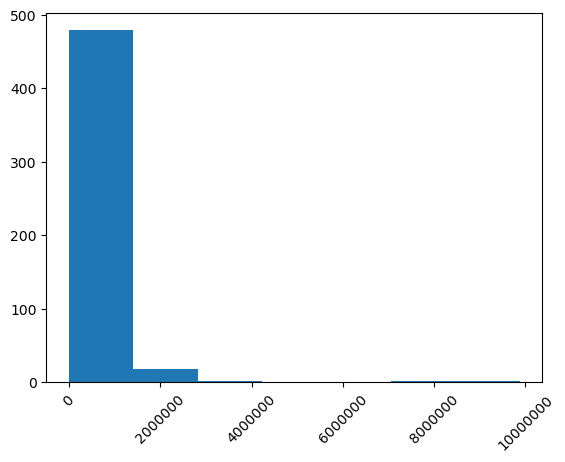

In [101]:
plt.hist(df['Annual Income'],bins = 7)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


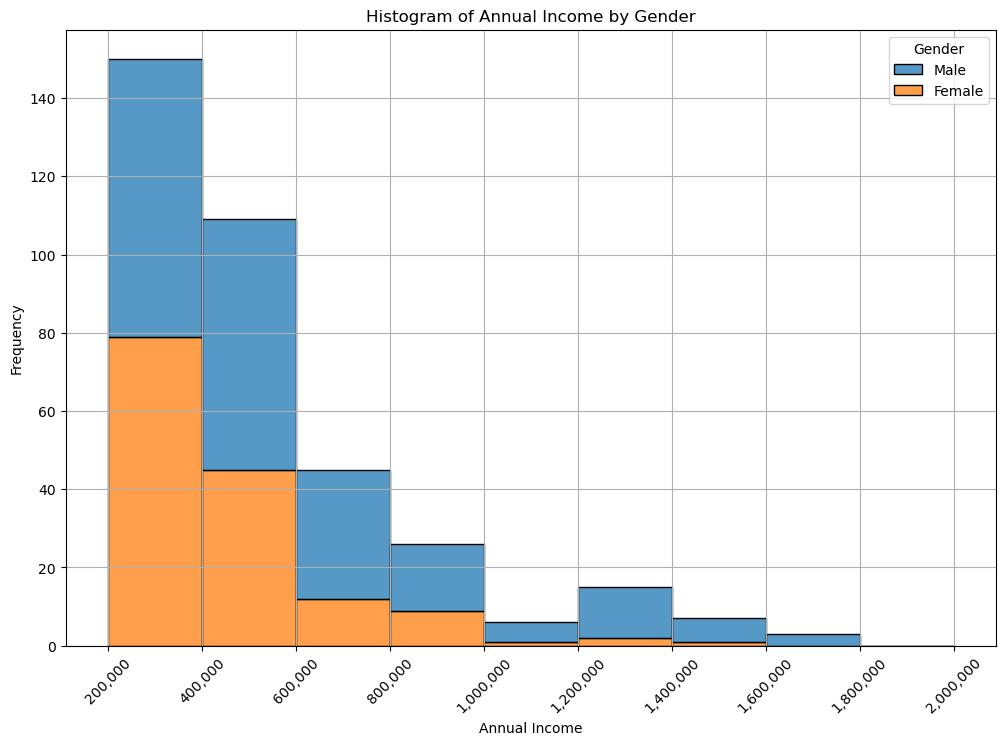

In [102]:

# Define bins for the histogram
bins = [200000, 400000, 600000, 800000, 1000000, 1200000, 1400000, 1600000, 1800000, 2000000]

# Create the histogram with hue
plt.figure(figsize=(12, 8))
sns.histplot(df, x='Annual Income', hue='Gender', bins=bins, multiple='stack', edgecolor='black')

# Customize the x-axis labels
plt.ticklabel_format(style='plain')
plt.xticks(bins, [f'{x:,}' for x in bins], rotation=45)

# Add titles and labels
plt.title('Histogram of Annual Income by Gender')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

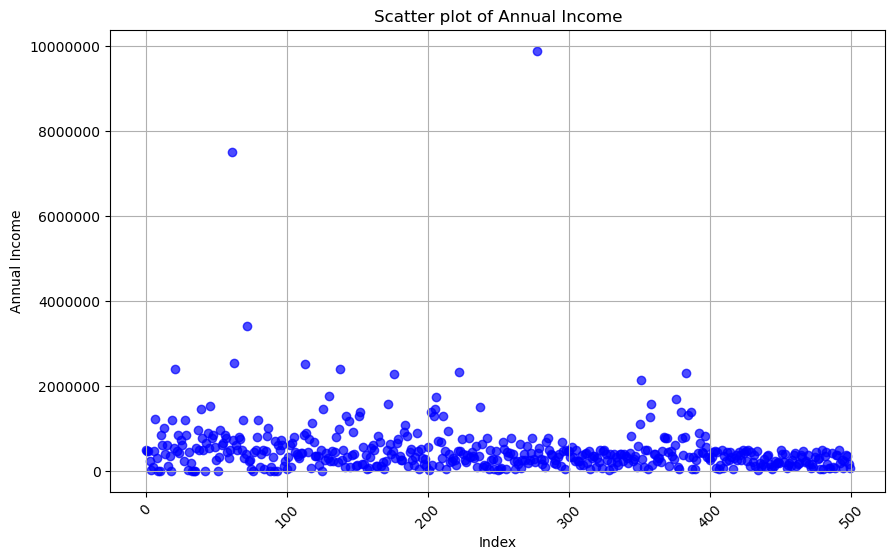

In [103]:
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['Annual Income'], color='blue', alpha=0.7)
plt.title('Scatter plot of Annual Income')
plt.xlabel('Index')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()

# AccountBalance

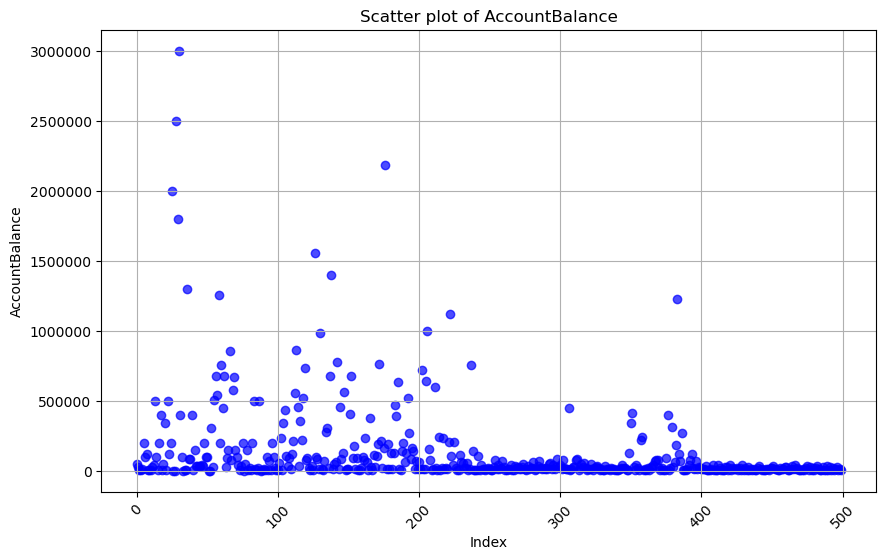

In [104]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['AccountBalance'], color='blue', alpha=0.7)
plt.title('Scatter plot of AccountBalance')
plt.xlabel('Index')
plt.ylabel('AccountBalance')
plt.grid(True)
plt.show()

(array([-500000.,       0.,  500000., 1000000., 1500000., 2000000.,
        2500000., 3000000., 3500000.]),
 [Text(-500000.0, 0, '−500000'),
  Text(0.0, 0, '0'),
  Text(500000.0, 0, '500000'),
  Text(1000000.0, 0, '1000000'),
  Text(1500000.0, 0, '1500000'),
  Text(2000000.0, 0, '2000000'),
  Text(2500000.0, 0, '2500000'),
  Text(3000000.0, 0, '3000000'),
  Text(3500000.0, 0, '3500000')])

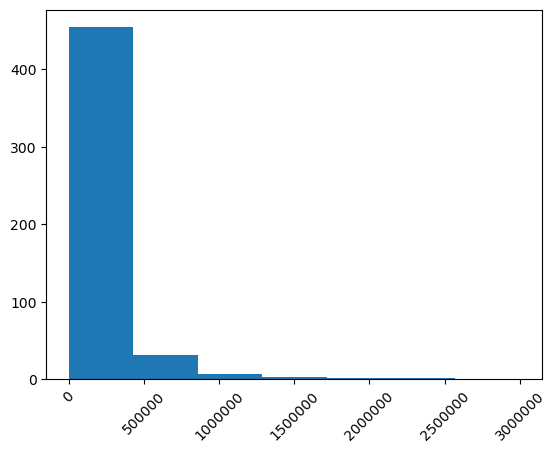

In [105]:
plt.hist(df['AccountBalance'],bins = 7)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

C:\Users\LENOVO\anaconda3\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


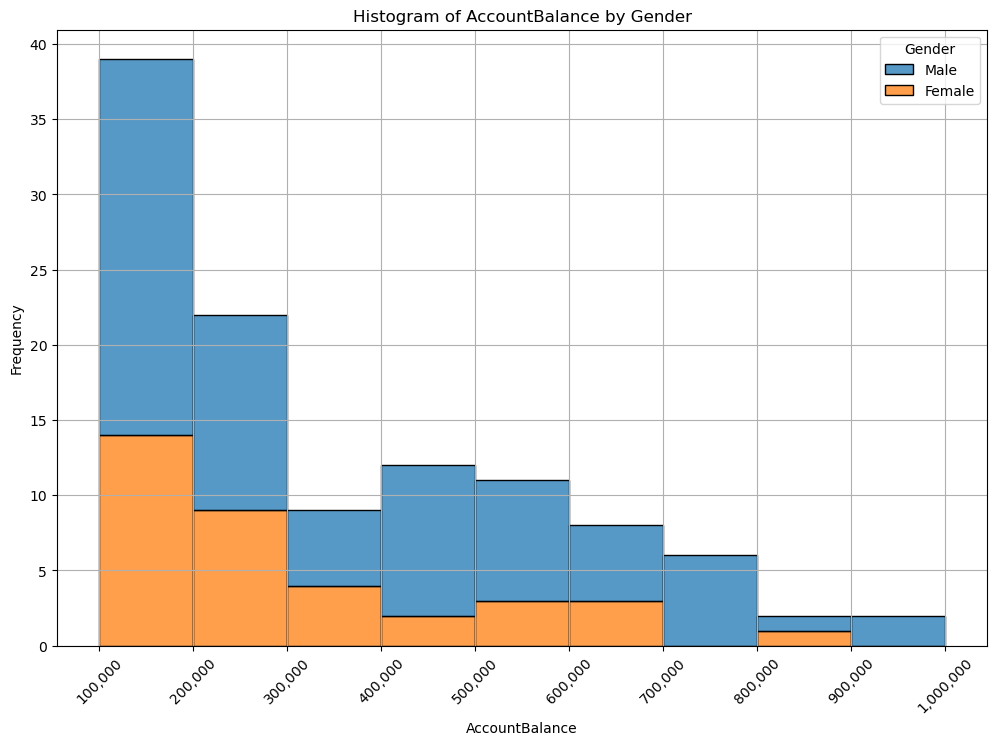

In [106]:

# Define bins for the histogram
bins = [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]

# Create the histogram with hue
plt.figure(figsize=(12, 8))
sns.histplot(df, x='AccountBalance', hue='Gender', bins=bins, multiple='stack', edgecolor='black')

# Customize the x-axis labels
plt.ticklabel_format(style='plain')
plt.xticks(bins, [f'{x:,}' for x in bins], rotation=45)

# Add titles and labels
plt.title('Histogram of AccountBalance by Gender')
plt.xlabel('AccountBalance')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

# Networth

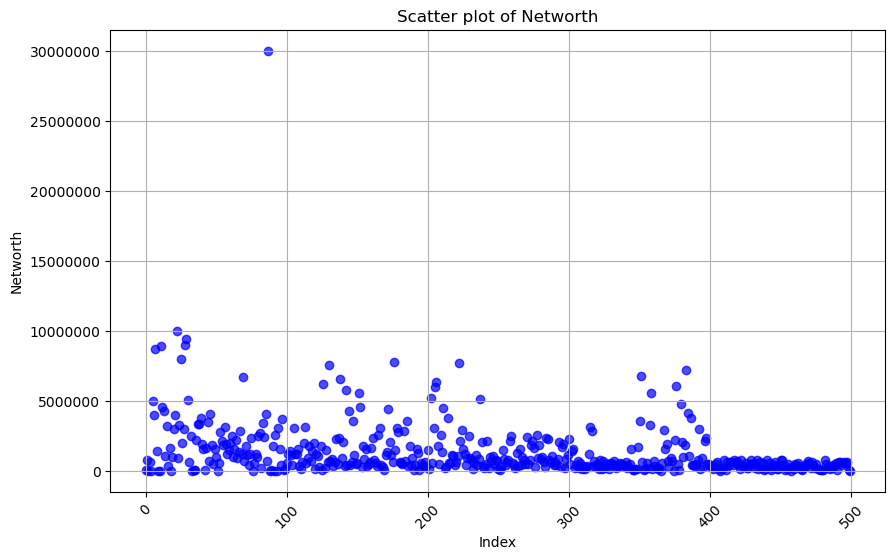

In [107]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['Networth'], color='blue', alpha=0.7)
plt.title('Scatter plot of Networth')
plt.xlabel('Index')
plt.ylabel('Networth')
plt.grid(True)
plt.show()

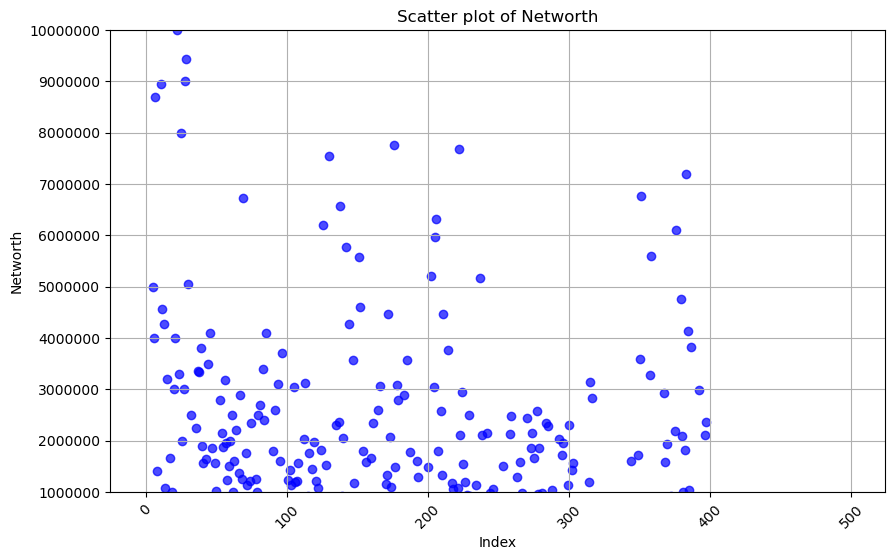

In [108]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
plt.scatter(df.index, df['Networth'], color='blue', alpha=0.7)
plt.title('Scatter plot of Networth')
plt.xlabel('Index')
plt.ylabel('Networth')
plt.grid(True)

plt.ylim(1000000, 10000000)
plt.yticks(range(1000000, 10000001, 1000000))

plt.show()

(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000., 35000000.]),
 [Text(-5000000.0, 0, '−5000000'),
  Text(0.0, 0, '0'),
  Text(5000000.0, 0, '5000000'),
  Text(10000000.0, 0, '10000000'),
  Text(15000000.0, 0, '15000000'),
  Text(20000000.0, 0, '20000000'),
  Text(25000000.0, 0, '25000000'),
  Text(30000000.0, 0, '30000000'),
  Text(35000000.0, 0, '35000000')])

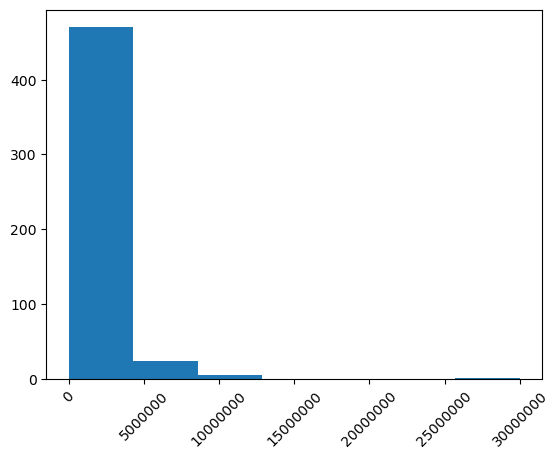

In [109]:
plt.hist(df['Networth'],bins = 7)
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

# Vehicle

In [111]:
df['Vehicle'].value_counts()

Vehicle
yes    263
no     237
Name: count, dtype: int64

<Axes: xlabel='Vehicle', ylabel='count'>

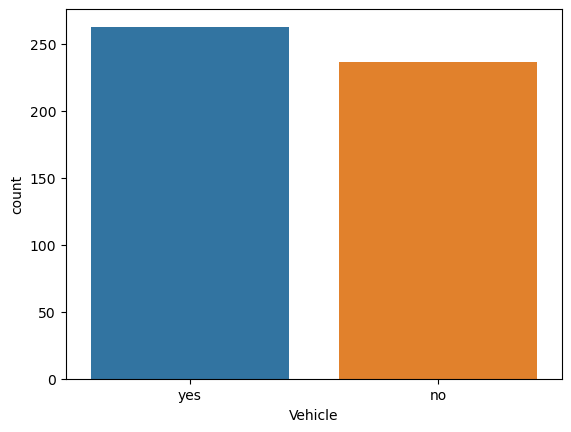

In [112]:
sns.countplot(x='Vehicle',data=df)

<Axes: xlabel='Vehicle'>

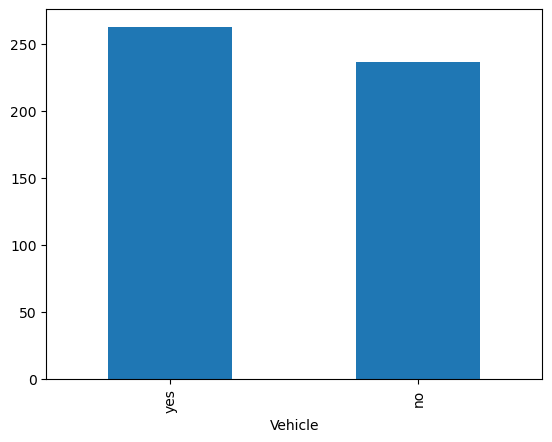

In [113]:
df['Vehicle'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

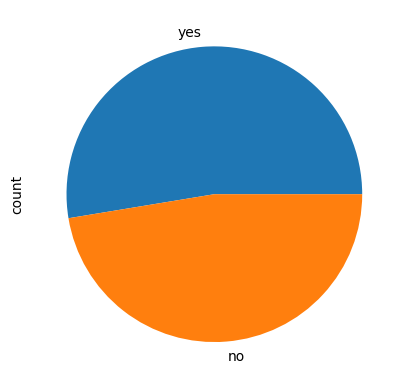

In [114]:
df['Vehicle'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

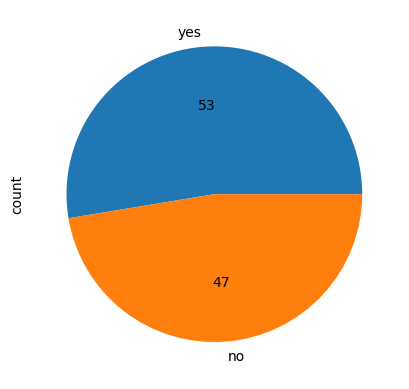

In [115]:
df['Vehicle'].value_counts().plot(kind='pie',autopct='%.f')

# House

In [116]:
df['House'].value_counts()

House
rented    189
owned     165
own       146
Name: count, dtype: int64

In [118]:
df['House'] = df['House'].replace('own', 'owned')

<Axes: xlabel='House', ylabel='count'>

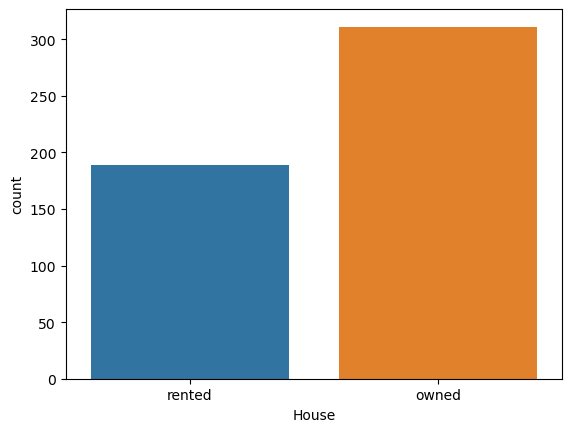

In [119]:
sns.countplot(x='House',data=df)

<Axes: xlabel='House'>

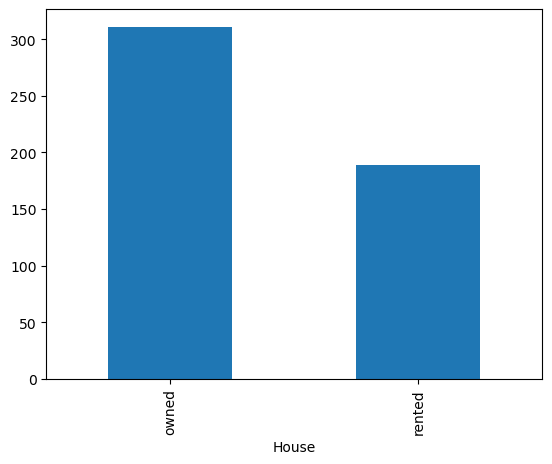

In [120]:
df['House'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

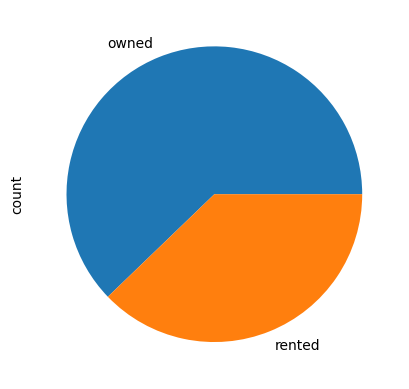

In [121]:
df['House'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

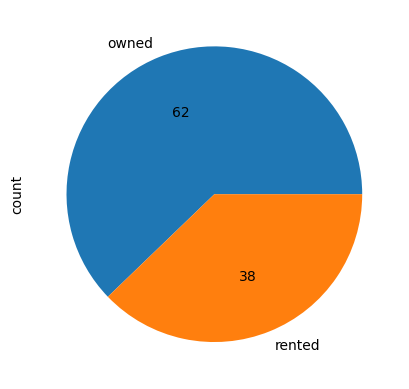

In [122]:
df['House'].value_counts().plot(kind='pie',autopct='%.f')

# Bivariate Analysis

In [110]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000    760.000000    Male   
1     49         480000   Salaried           30000    750.000000    Male   
2     37         480000   Salaried           10000    710.000000    Male   
3     21         240000   Salaried            5000    700.000000    Male   
4     42          35000  Housewife           12500    800.000000  Female   
..   ...            ...        ...             ...           ...     ...   
495   26         223347      Other           17759    674.448695  Female   
496   29         384000   Business           31590    821.933399  Female   
497   57         362322      Other            5048    770.625315  Female   
498   62         168828      Other           15539    847.630622  Female   
499   65          61057      Other            5600    655.952893  Female   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
495   Post Graduate             1              6            No       3   
496  Under Graduate             3              4           Yes       1   
497  Under Graduate             3              2           Yes       5   
498  Under Graduate             1              1            No      34   
499        Graduate             0              6           Yes      15   

     LastMonthTrans  Networth Married  Dependents Vehicle   House  
0                33    100000     yes           2     yes  rented  
1                23    800087     yes           3      no     own  
2                34     30000     yes           4     yes  rented  
3                25    650000      no           0      no     own  
4                56     10000     yes           3     yes     own  
..              ...       ...     ...         ...     ...     ...  
495              50    642447      no           1     yes     own  
496              35    560076      no           1      no     own  
497              55    609861      no           1      no   owned  
498              37     63006      no           2      no   owned  
499              57     16371      no           2      no   owned  

[500 rows x 17 columns]

# Age vs Annual Income

<Axes: xlabel='Annual Income', ylabel='Age'>

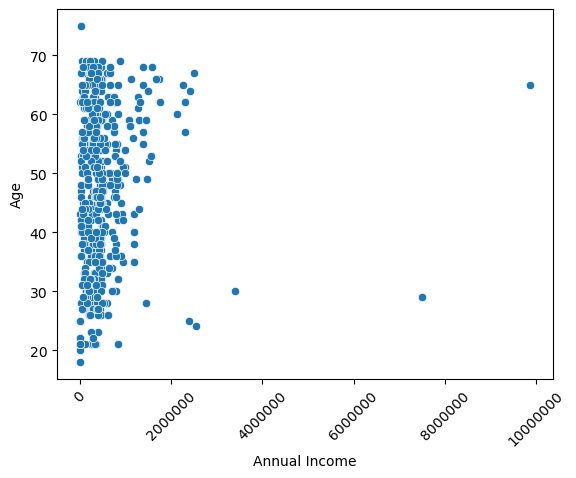

In [115]:
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='Age',data=df)

<Axes: xlabel='Annual Income', ylabel='Age'>

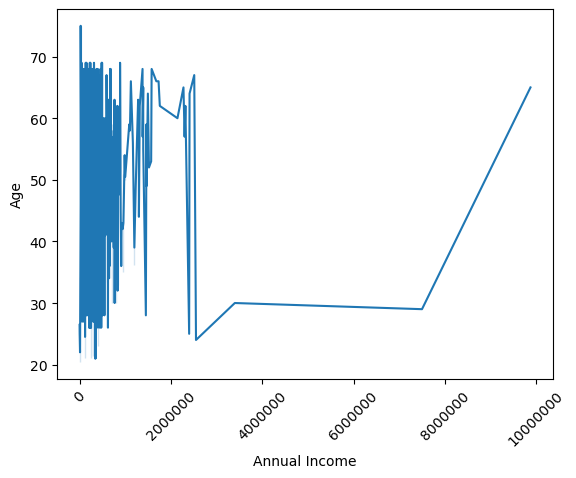

In [116]:
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.lineplot(x='Annual Income',y='Age',data=df)

(array([-2000000.,        0.,  2000000.,  4000000.,  6000000.,  8000000.,
        10000000., 12000000.]),
 [Text(-2000000.0, 0, '−2000000'),
  Text(0.0, 0, '0'),
  Text(2000000.0, 0, '2000000'),
  Text(4000000.0, 0, '4000000'),
  Text(6000000.0, 0, '6000000'),
  Text(8000000.0, 0, '8000000'),
  Text(10000000.0, 0, '10000000'),
  Text(12000000.0, 0, '12000000')])

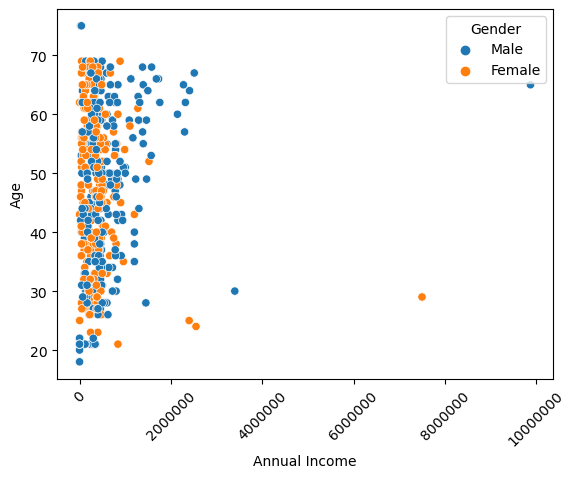

In [117]:
sns.scatterplot(x='Annual Income',y='Age',data=df,hue=df['Gender'])
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

<Axes: xlabel='Annual Income', ylabel='Age'>

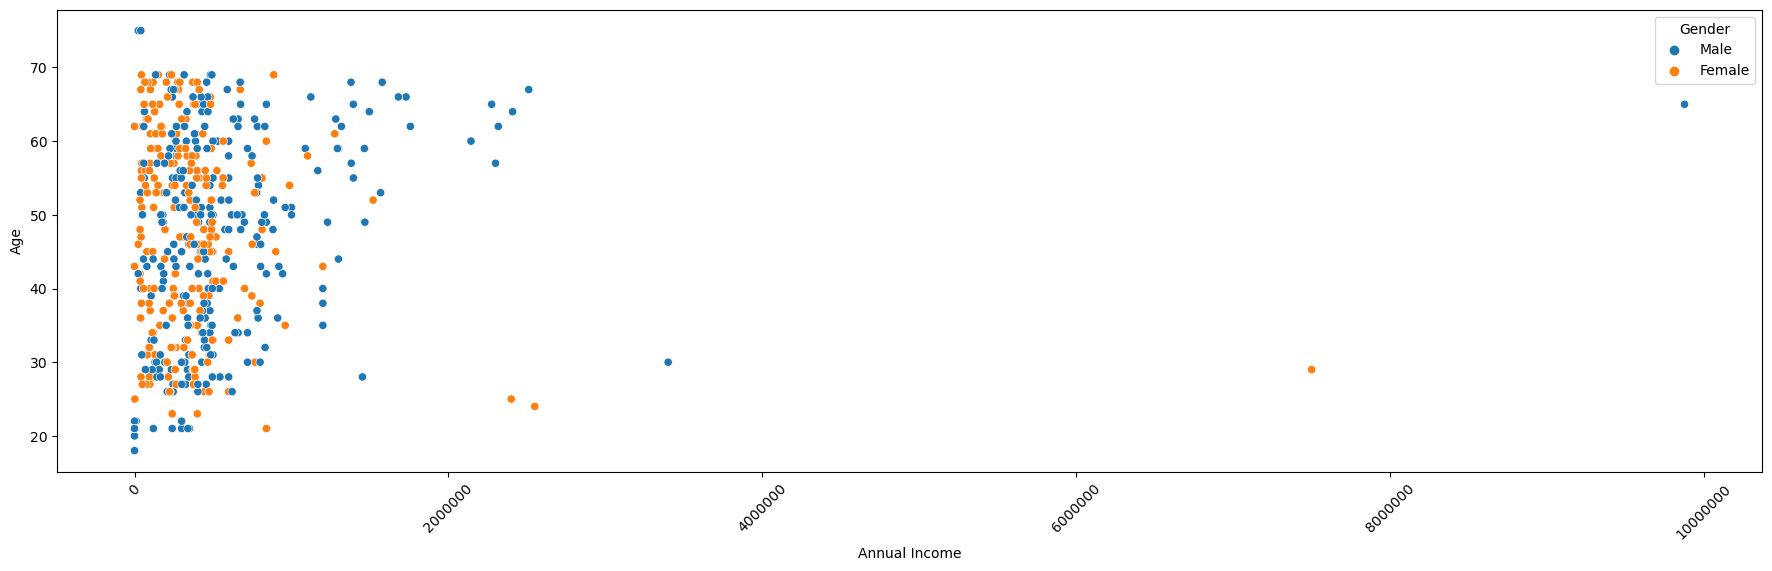

In [118]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='Age',data=df,hue=df['Gender'])

<Axes: xlabel='AccountBalance', ylabel='Age'>

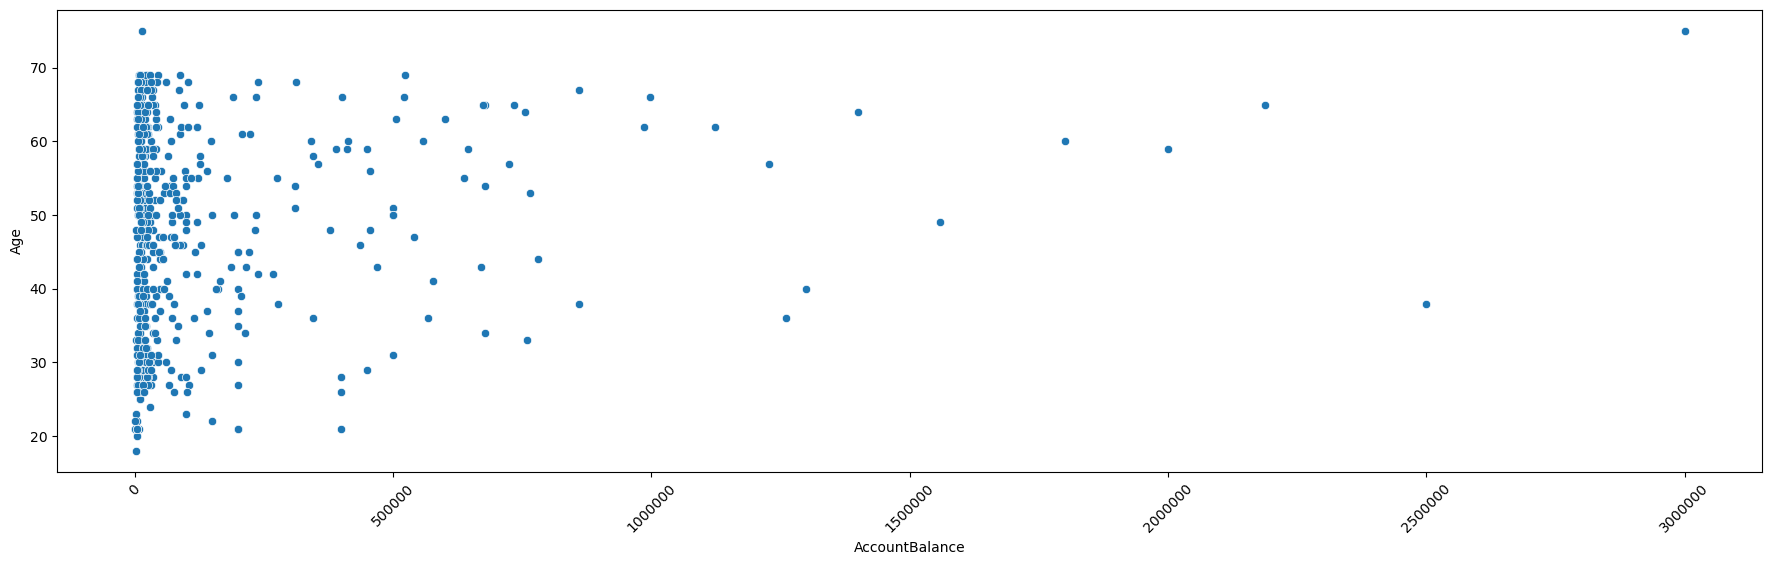

In [119]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='AccountBalance',y='Age',data=df)

<Axes: xlabel='AccountBalance', ylabel='Age'>

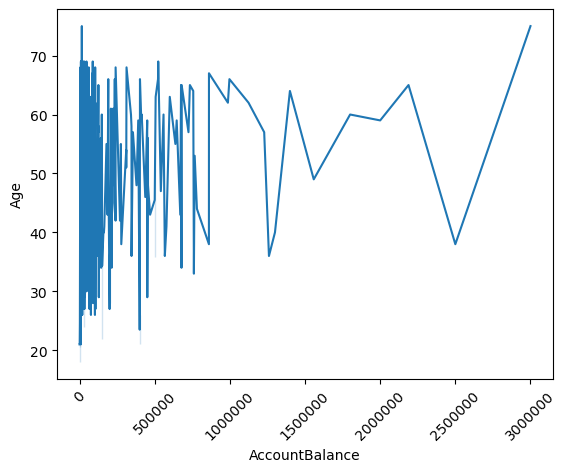

In [120]:
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)

sns.lineplot(x='AccountBalance',y='Age',data=df)

In [121]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000    760.000000    Male   
1     49         480000   Salaried           30000    750.000000    Male   
2     37         480000   Salaried           10000    710.000000    Male   
3     21         240000   Salaried            5000    700.000000    Male   
4     42          35000  Housewife           12500    800.000000  Female   
..   ...            ...        ...             ...           ...     ...   
495   26         223347      Other           17759    674.448695  Female   
496   29         384000   Business           31590    821.933399  Female   
497   57         362322      Other            5048    770.625315  Female   
498   62         168828      Other           15539    847.630622  Female   
499   65          61057      Other            5600    655.952893  Female   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
495   Post Graduate             1              6            No       3   
496  Under Graduate             3              4           Yes       1   
497  Under Graduate             3              2           Yes       5   
498  Under Graduate             1              1            No      34   
499        Graduate             0              6           Yes      15   

     LastMonthTrans  Networth Married  Dependents Vehicle   House  
0                33    100000      no           2     yes  rented  
1                23    800087     yes           3      no     own  
2                34     30000     yes           4     yes  rented  
3                25    650000      no           0      no     own  
4                56     10000     yes           3     yes     own  
..              ...       ...     ...         ...     ...     ...  
495              50    642447      no           1     yes     own  
496              35    560076      no           1      no     own  
497              55    609861      no           1      no   owned  
498              37     63006      no           2      no   owned  
499              57     16371      no           2      no   owned  

[500 rows x 17 columns]

# Annual Income	 vs credit_score

(0.0, 1100.0)

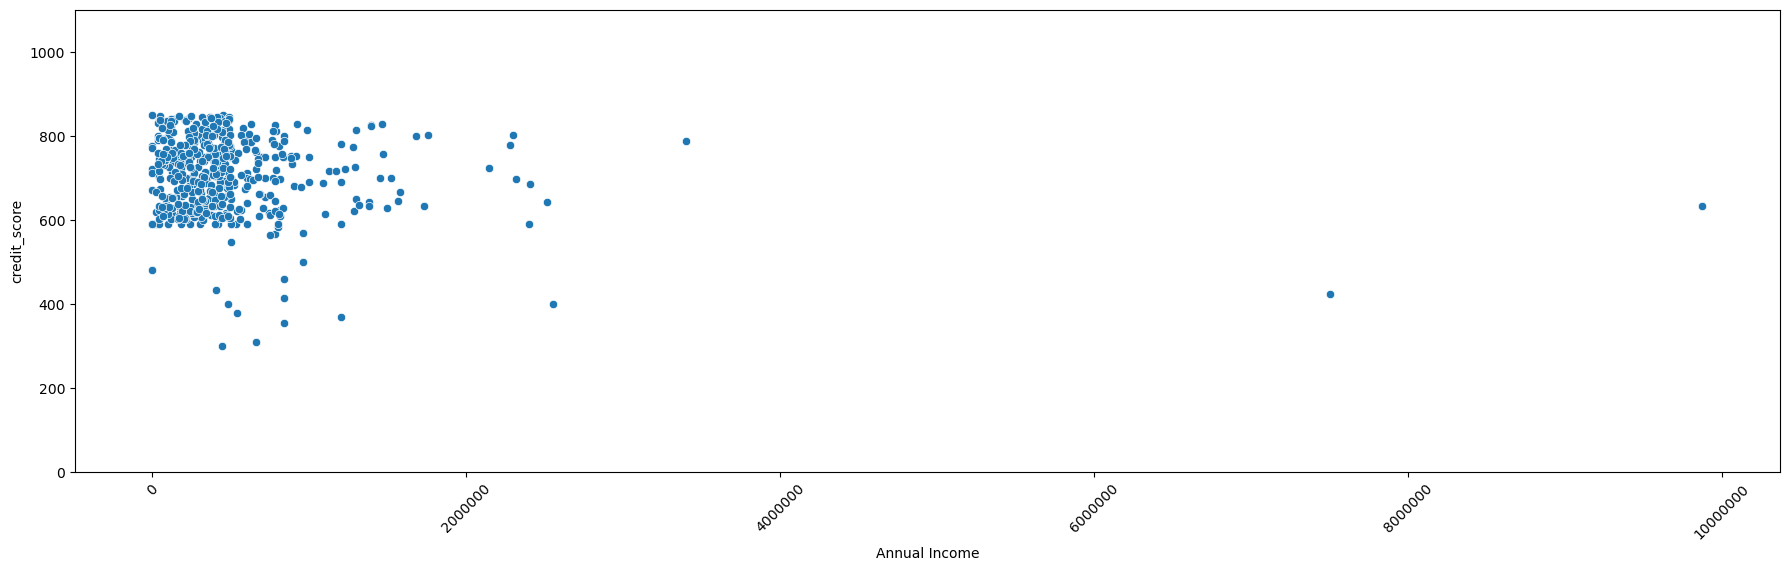

In [122]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='credit_score',data=df)
plt.ylim(0, 1100)

(250.0, 900.0)

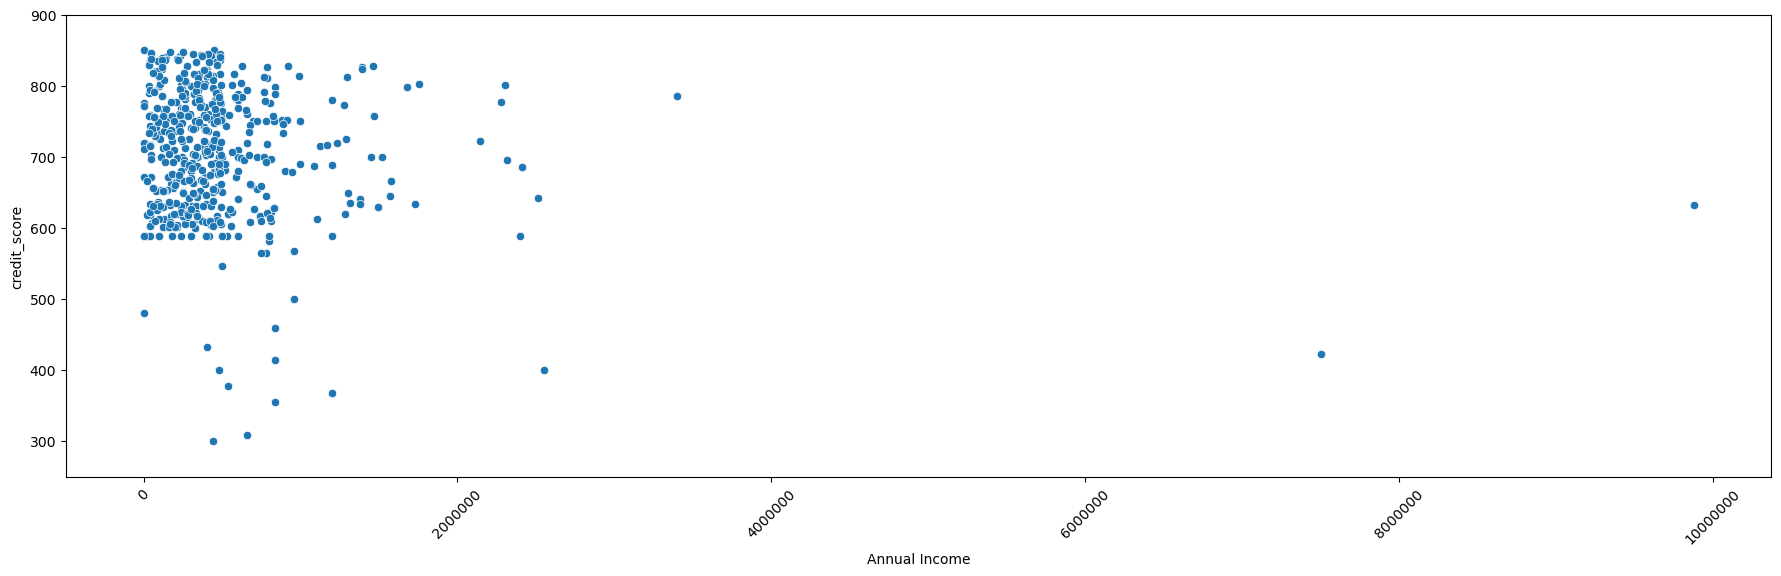

In [123]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Annual Income',y='credit_score',data=df)
plt.ylim(250, 900)

In [124]:
df['credit_score'].describe()

count    500.000000
mean     707.296068
std       91.237042
min      300.000000
25%      641.396030
50%      713.596800
75%      777.644713
max      850.000000
Name: credit_score, dtype: float64

# credit_score vs LastMonthTrans

(0.0, 1100.0)

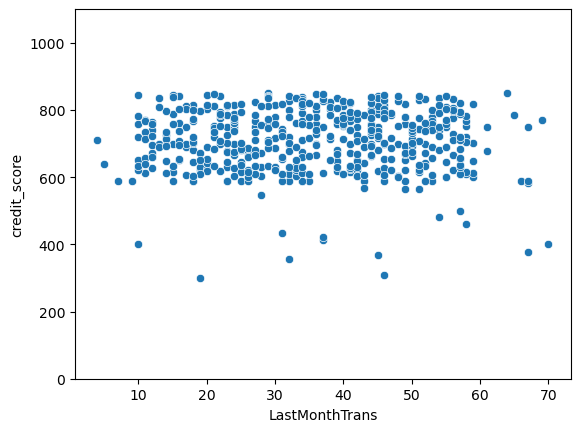

In [125]:
sns.scatterplot(x='LastMonthTrans',y='credit_score',data=df)
# Set the maximum value for both axes to 1000
#plt.xlim(0, 1000)
plt.ylim(0, 1100)

(0.0, 1200.0)

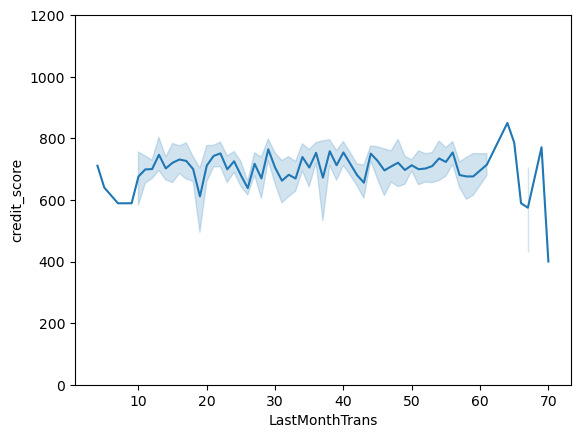

In [126]:
sns.lineplot(x='LastMonthTrans',y='credit_score',data=df)
plt.ylim(0,1200)

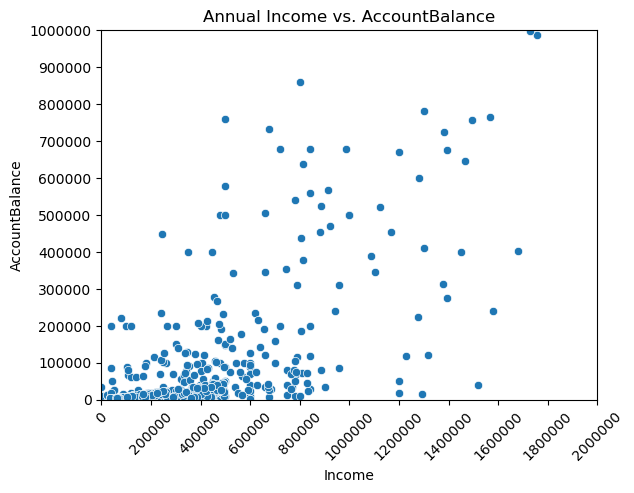

In [127]:
sns.scatterplot(x='Annual Income', y='AccountBalance', data=df)

# Set the axis ranges
plt.xlim(200000, 2000000)
plt.ylim(100000, 1000000)

# Set tick marks for better readability
plt.xticks(range(0, 2000001, 200000))
plt.yticks(range(0, 1000001, 100000))




plt.ticklabel_format(style='plain')
plt.xticks(rotation=45) 
plt.title('Annual Income vs. AccountBalance')
plt.xlabel('Income')
plt.ylabel('AccountBalance')
plt.show()

In [128]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000    760.000000    Male   
1     49         480000   Salaried           30000    750.000000    Male   
2     37         480000   Salaried           10000    710.000000    Male   
3     21         240000   Salaried            5000    700.000000    Male   
4     42          35000  Housewife           12500    800.000000  Female   
..   ...            ...        ...             ...           ...     ...   
495   26         223347      Other           17759    674.448695  Female   
496   29         384000   Business           31590    821.933399  Female   
497   57         362322      Other            5048    770.625315  Female   
498   62         168828      Other           15539    847.630622  Female   
499   65          61057      Other            5600    655.952893  Female   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
495   Post Graduate             1              6            No       3   
496  Under Graduate             3              4           Yes       1   
497  Under Graduate             3              2           Yes       5   
498  Under Graduate             1              1            No      34   
499        Graduate             0              6           Yes      15   

     LastMonthTrans  Networth Married  Dependents Vehicle   House  
0                33    100000      no           2     yes  rented  
1                23    800087     yes           3      no     own  
2                34     30000     yes           4     yes  rented  
3                25    650000      no           0      no     own  
4                56     10000     yes           3     yes     own  
..              ...       ...     ...         ...     ...     ...  
495              50    642447      no           1     yes     own  
496              35    560076      no           1      no     own  
497              55    609861      no           1      no   owned  
498              37     63006      no           2      no   owned  
499              57     16371      no           2      no   owned  

[500 rows x 17 columns]

<Axes: xlabel='AccountBalance', ylabel='Networth'>

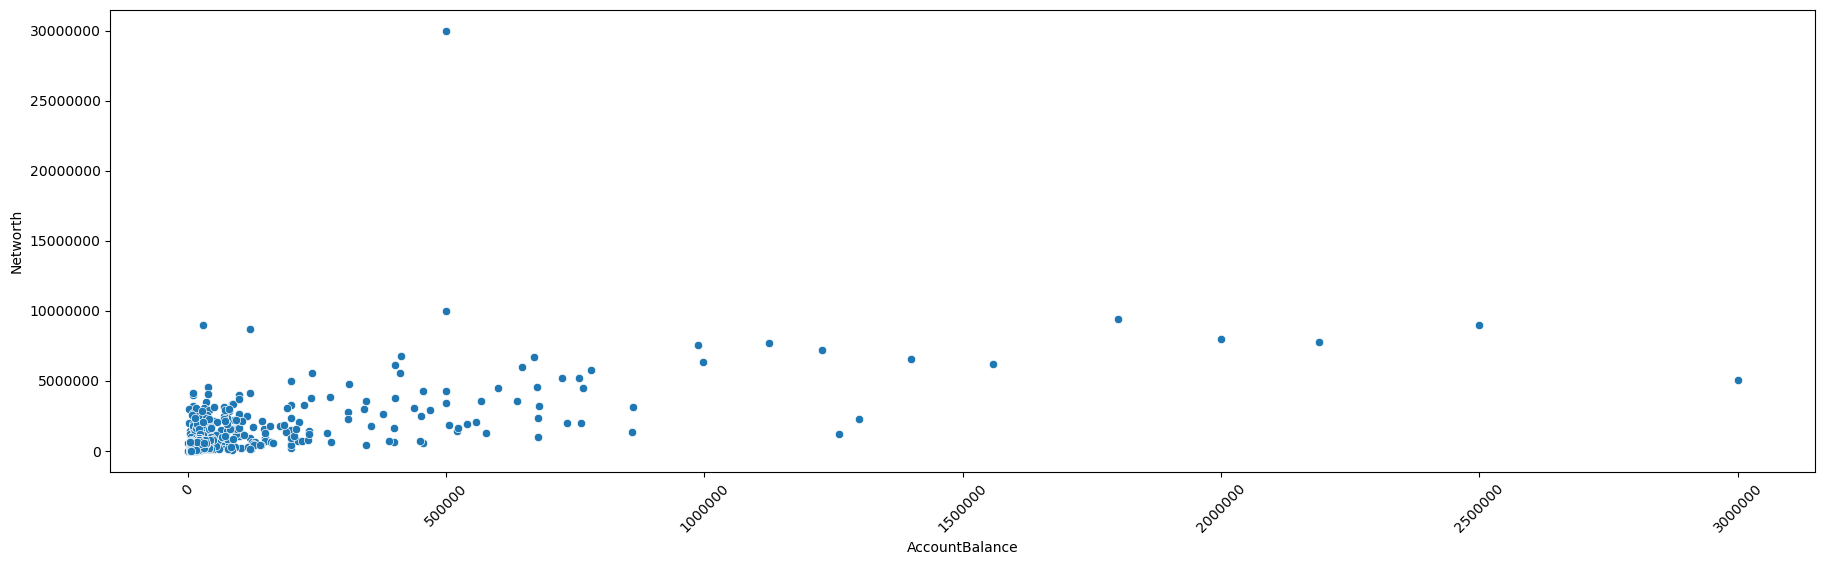

In [129]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='AccountBalance',y='Networth',data=df)

<Axes: xlabel='AccountBalance', ylabel='Networth'>

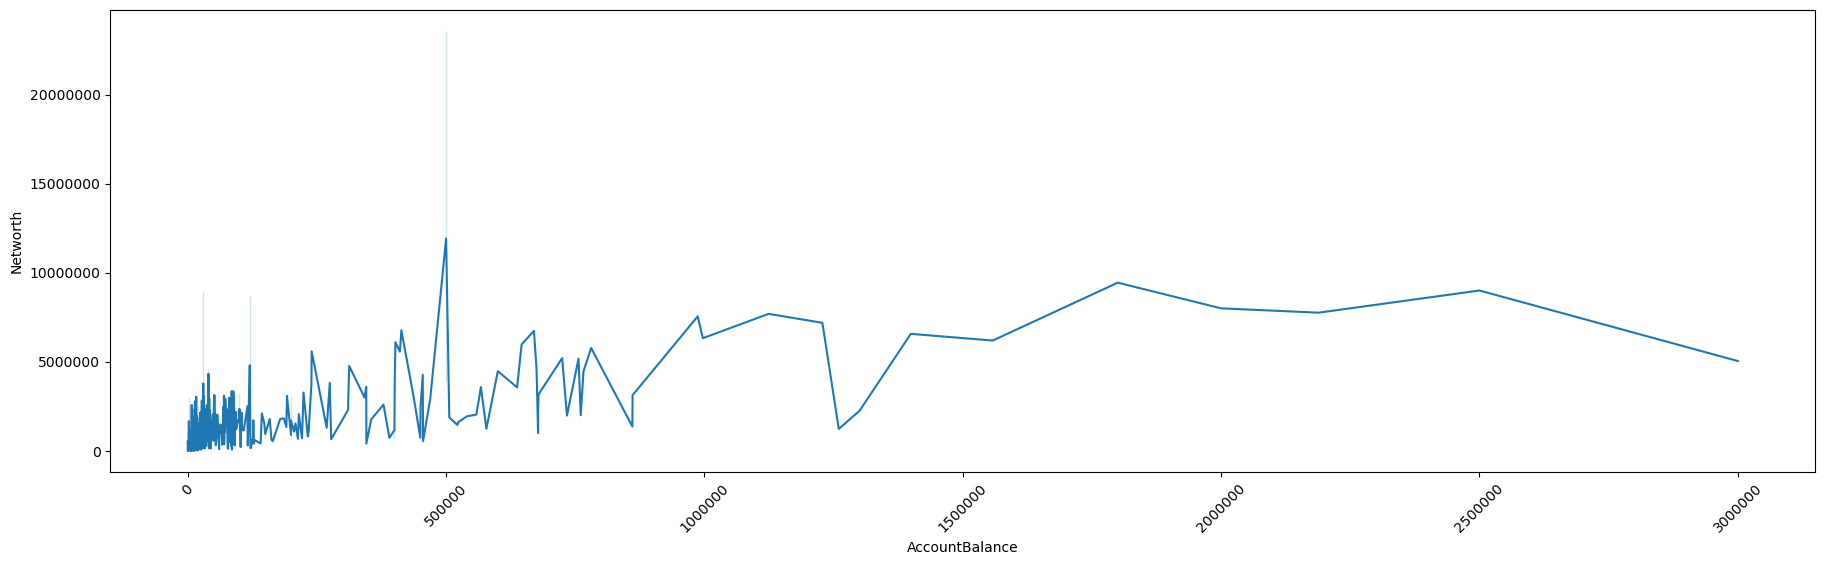

In [130]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.lineplot(x='AccountBalance',y='Networth',data=df)

<Axes: xlabel='Age', ylabel='Networth'>

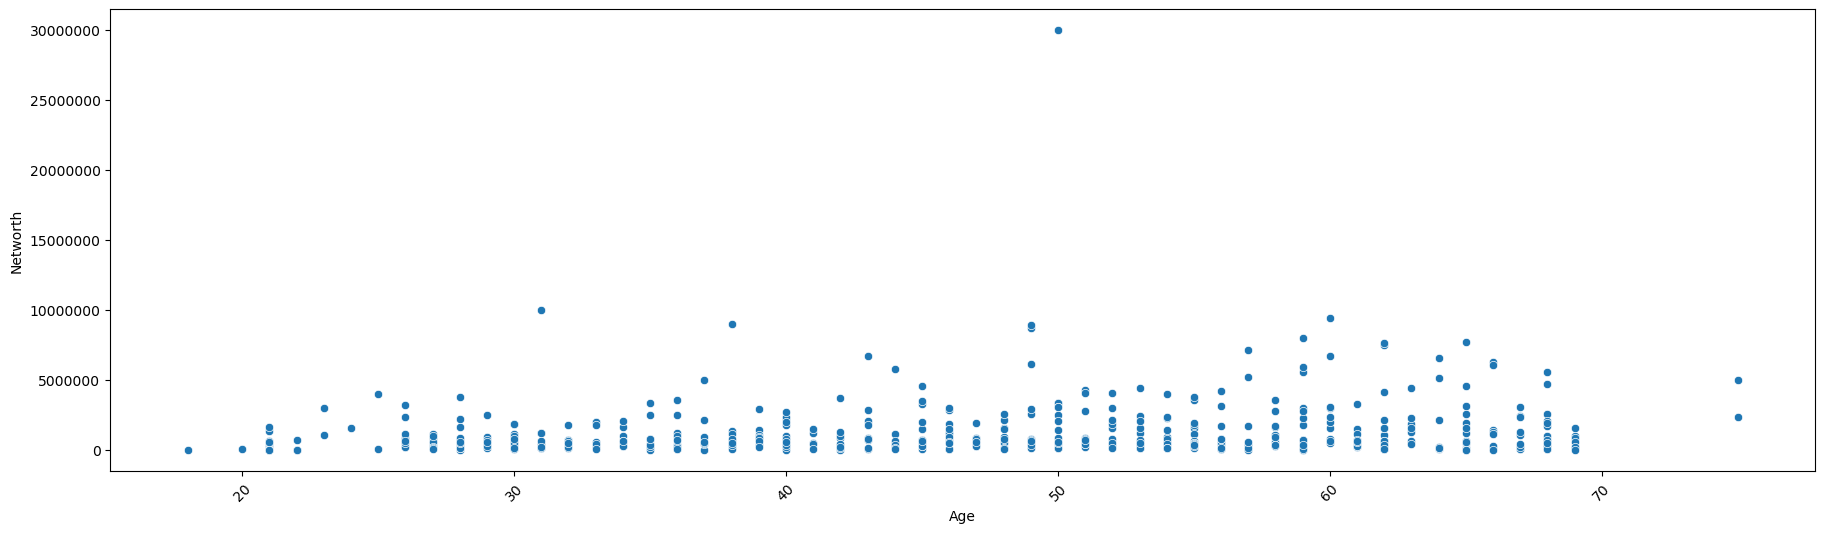

In [131]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.scatterplot(x='Age',y='Networth',data=df)

<Axes: xlabel='Age', ylabel='Networth'>

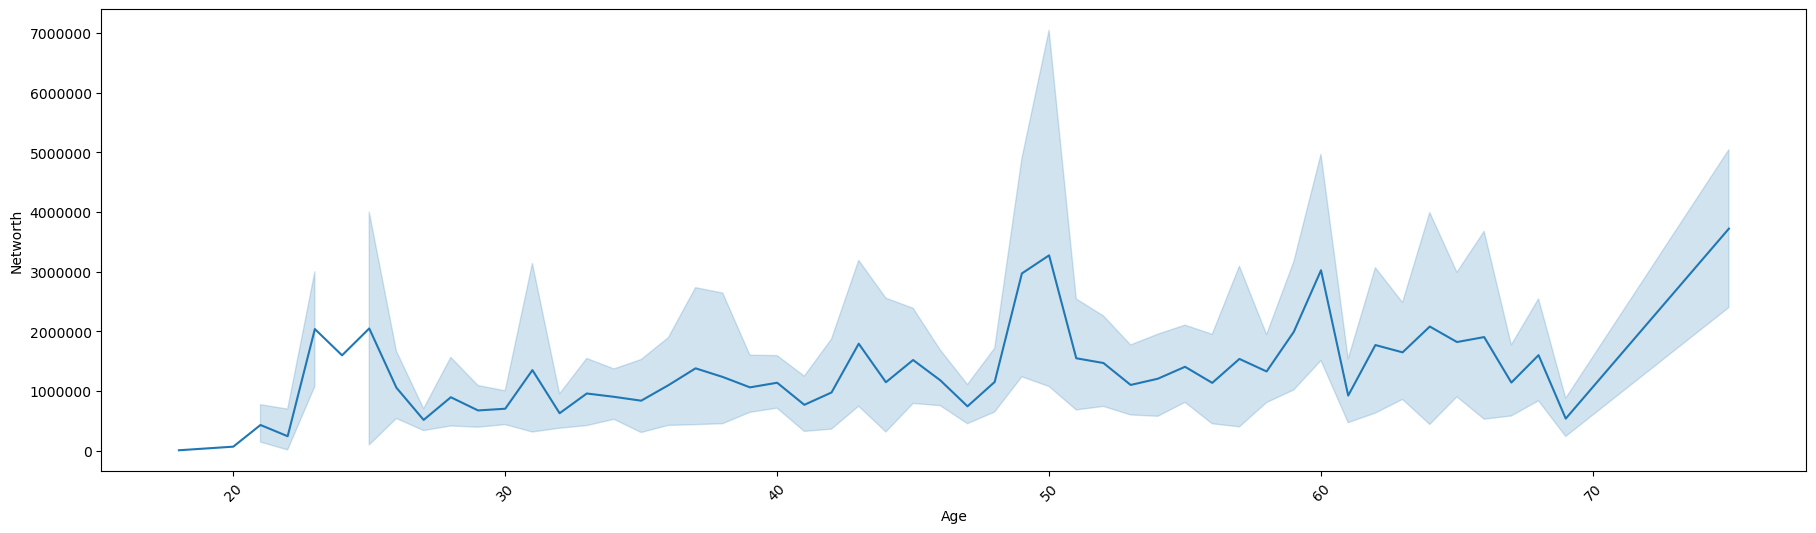

In [132]:
plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
sns.lineplot(x='Age',y='Networth',data=df)

# Married vs Networth

In [133]:
df['Married'].value_counts()

Married
yes    283
no     217
Name: count, dtype: int64

<Axes: xlabel='Married', ylabel='Networth'>

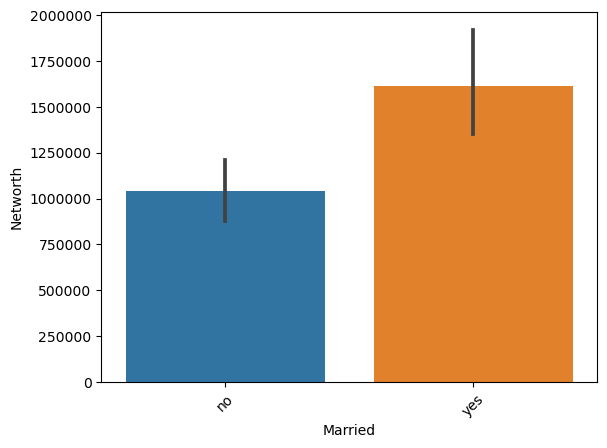

In [134]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Married',y='Networth',data=df)

# Gender vs Networth

<Axes: xlabel='Gender', ylabel='Networth'>

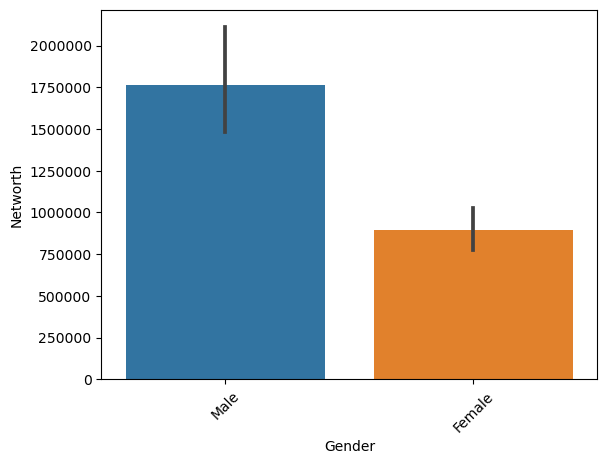

In [135]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Gender',y='Networth',data=df)

/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_2435/1244760426.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_2435/1244760426.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

<Axes: xlabel='Networth', ylabel='Density'>

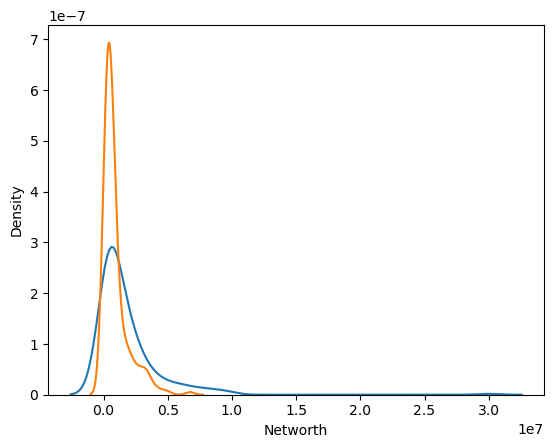

In [136]:
sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
sns.distplot(df[df['Gender']=='Female']['Networth'],hist=False)

In [137]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000    760.000000    Male   
1     49         480000   Salaried           30000    750.000000    Male   
2     37         480000   Salaried           10000    710.000000    Male   
3     21         240000   Salaried            5000    700.000000    Male   
4     42          35000  Housewife           12500    800.000000  Female   
..   ...            ...        ...             ...           ...     ...   
495   26         223347      Other           17759    674.448695  Female   
496   29         384000   Business           31590    821.933399  Female   
497   57         362322      Other            5048    770.625315  Female   
498   62         168828      Other           15539    847.630622  Female   
499   65          61057      Other            5600    655.952893  Female   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
495   Post Graduate             1              6            No       3   
496  Under Graduate             3              4           Yes       1   
497  Under Graduate             3              2           Yes       5   
498  Under Graduate             1              1            No      34   
499        Graduate             0              6           Yes      15   

     LastMonthTrans  Networth Married  Dependents Vehicle   House  
0                33    100000      no           2     yes  rented  
1                23    800087     yes           3      no     own  
2                34     30000     yes           4     yes  rented  
3                25    650000      no           0      no     own  
4                56     10000     yes           3     yes     own  
..              ...       ...     ...         ...     ...     ...  
495              50    642447      no           1     yes     own  
496              35    560076      no           1      no     own  
497              55    609861      no           1      no   owned  
498              37     63006      no           2      no   owned  
499              57     16371      no           2      no   owned  

[500 rows x 17 columns]

# Active_loans vs Networth

/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_2435/3145418287.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_2435/3145418287.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

<Axes: xlabel='Networth', ylabel='Density'>

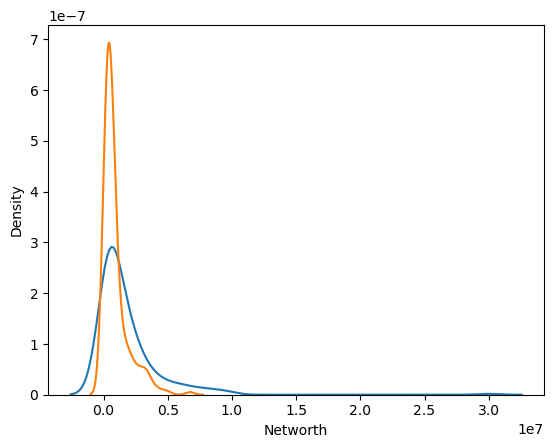

In [138]:
#plt.figure(figsize=(22, 6))
#plt.ticklabel_format(style='plain')
#plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)
sns.distplot(df[df['Gender']=='Male']['Networth'],hist=False)
sns.distplot(df[df['Gender']=='Female']['Networth'],hist=False)

/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_2435/3601542953.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Gender']=='Male']['Networth'], hist=False, color='blue', label='Male')
/var/folders/jt/4kqlghkd1cz9fr3h3qcbzjvm0000gn/T/ipykernel_2435/3601542953.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/m

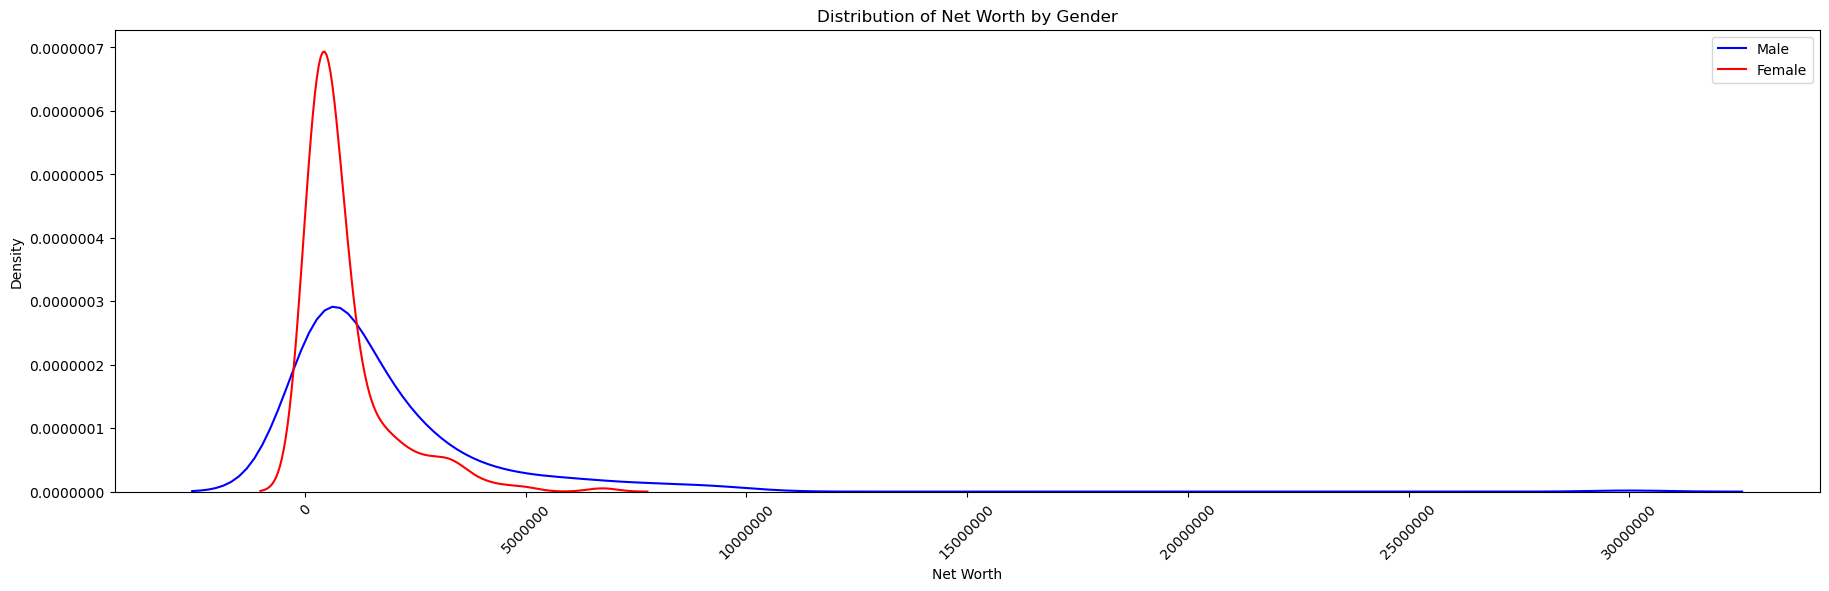

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(22, 6))

# Remove scientific notation for tick labels
plt.ticklabel_format(style='plain')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Create distribution plots with specified colors
sns.distplot(df[df['Gender']=='Male']['Networth'], hist=False, color='blue', label='Male')
sns.distplot(df[df['Gender']=='Female']['Networth'], hist=False, color='red', label='Female')

# Add legend
plt.legend()

# Add labels and title
plt.xlabel('Net Worth')
plt.ylabel('Density')
plt.title('Distribution of Net Worth by Gender')

# Display the plot
plt.show()


<Axes: xlabel='Active_loans', ylabel='Networth'>

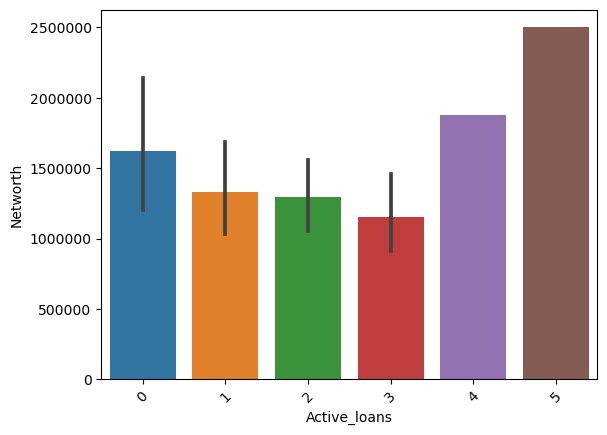

In [140]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Active_loans',y='Networth',data=df)

# Active Loans vs Credit score

<Axes: xlabel='Active_loans', ylabel='credit_score'>

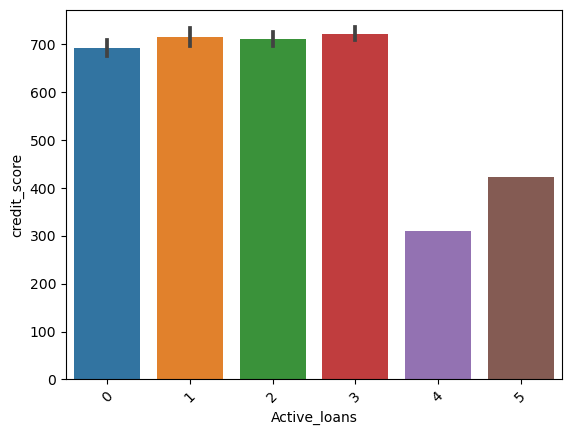

In [141]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Active_loans',y='credit_score',data=df)

# Active Loans vs LastMonthTrans

<Axes: xlabel='Active_loans', ylabel='LastMonthTrans'>

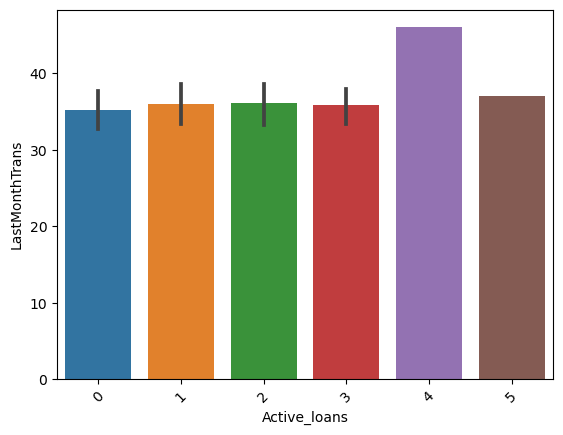

In [142]:
#plt.figure(figsize=(22, 6))
plt.ticklabel_format(style='plain')
plt.xticks(rotation=45)
# sns.lineplot(x='Age',y='Networth',data=df)

sns.barplot(x='Active_loans',y='LastMonthTrans',data=df)

# Bank Products vs Annual Income

In [143]:
df['Bank_Products'].value_counts()

Bank_Products
1    105
4     90
2     87
3     80
6     72
5     66
Name: count, dtype: int64

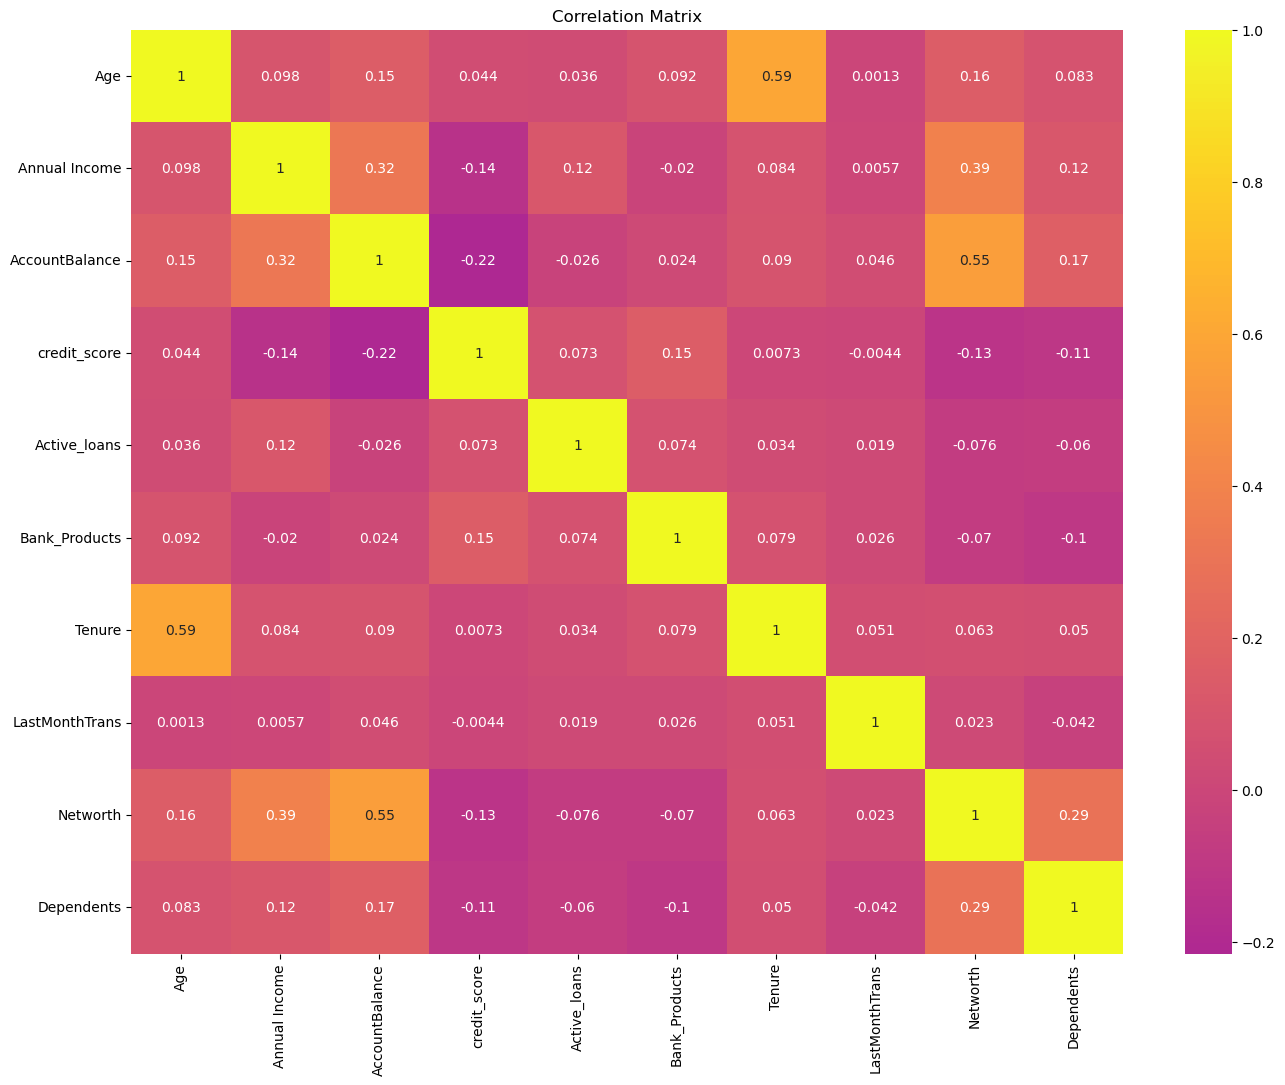

In [144]:
df1 = df.select_dtypes(include=['int64', 'float64'])


corr_matrix = df1.corr()
plt.figure(figsize=(16, 12))

sns.heatmap(corr_matrix, annot=True, cmap='plasma', center=0)
plt.title('Correlation Matrix')
plt.show()

# Encoding

In [145]:
df

Age  Annual Income Occupation  AccountBalance  credit_score  Gender  \
0     45         500100   Salaried           50000    760.000000    Male   
1     49         480000   Salaried           30000    750.000000    Male   
2     37         480000   Salaried           10000    710.000000    Male   
3     21         240000   Salaried            5000    700.000000    Male   
4     42          35000  Housewife           12500    800.000000  Female   
..   ...            ...        ...             ...           ...     ...   
495   26         223347      Other           17759    674.448695  Female   
496   29         384000   Business           31590    821.933399  Female   
497   57         362322      Other            5048    770.625315  Female   
498   62         168828      Other           15539    847.630622  Female   
499   65          61057      Other            5600    655.952893  Female   

          Education  Active_loans  Bank_Products Fixed Deposit  Tenure  \
0          Graduate             2              5            No      11   
1          Graduate             2              3           Yes      10   
2    Under Graduate             0              2           Yes       6   
3    Under Graduate             1              2            No       2   
4          Graduate             1              2           Yes       8   
..              ...           ...            ...           ...     ...   
495   Post Graduate             1              6            No       3   
496  Under Graduate             3              4           Yes       1   
497  Under Graduate             3              2           Yes       5   
498  Under Graduate             1              1            No      34   
499        Graduate             0              6           Yes      15   

     LastMonthTrans  Networth Married  Dependents Vehicle   House  
0                33    100000      no           2     yes  rented  
1                23    800087     yes           3      no     own  
2                34     30000     yes           4     yes  rented  
3                25    650000      no           0      no     own  
4                56     10000     yes           3     yes     own  
..              ...       ...     ...         ...     ...     ...  
495              50    642447      no           1     yes     own  
496              35    560076      no           1      no     own  
497              55    609861      no           1      no   owned  
498              37     63006      no           2      no   owned  
499              57     16371      no           2      no   owned  

[500 rows x 17 columns]

In [146]:
from sklearn.preprocessing import OneHotEncoder


In [147]:
print("Unique values in 'House' column:", df['House'].unique())

Unique values in 'House' column: ['rented' 'own' 'owned']


In [148]:
df['House'] = df['House'].replace({'own': 'owned'})


In [149]:
columns_to_encode = ['Occupation', 'Gender','Married','House']

# Initialize the OneHotEncoder
encoder1 = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform the data
encoded_array = encoder1.fit_transform(df[columns_to_encode])

# Create a DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_array, columns=encoder1.get_feature_names_out(columns_to_encode))

# Reset index to ensure proper concatenation
df.reset_index(drop=True, inplace=True)
encoded_df.reset_index(drop=True, inplace=True)

# Concatenate the original DataFrame (excluding the encoded columns) with the encoded DataFrame
df_final = pd.concat([df.drop(columns=columns_to_encode), encoded_df], axis=1)


In [150]:
df_final

Age  Annual Income  AccountBalance  credit_score       Education  \
0     45         500100           50000    760.000000        Graduate   
1     49         480000           30000    750.000000        Graduate   
2     37         480000           10000    710.000000  Under Graduate   
3     21         240000            5000    700.000000  Under Graduate   
4     42          35000           12500    800.000000        Graduate   
..   ...            ...             ...           ...             ...   
495   26         223347           17759    674.448695   Post Graduate   
496   29         384000           31590    821.933399  Under Graduate   
497   57         362322            5048    770.625315  Under Graduate   
498   62         168828           15539    847.630622  Under Graduate   
499   65          61057            5600    655.952893        Graduate   

     Active_loans  Bank_Products Fixed Deposit  Tenure  LastMonthTrans  \
0               2              5            No      11              33   
1               2              3           Yes      10              23   
2               0              2           Yes       6              34   
3               1              2            No       2              25   
4               1              2           Yes       8              56   
..            ...            ...           ...     ...             ...   
495             1              6            No       3              50   
496             3              4           Yes       1              35   
497             3              2           Yes       5              55   
498             1              1            No      34              37   
499             0              6           Yes      15              57   

     Networth  Dependents Vehicle  Occupation_Housewife  Occupation_Other  \
0      100000           2     yes                   0.0               0.0   
1      800087           3      no                   0.0               0.0   
2       30000           4     yes                   0.0               0.0   
3      650000           0      no                   0.0               0.0   
4       10000           3     yes                   1.0               0.0   
..        ...         ...     ...                   ...               ...   
495    642447           1     yes                   0.0               1.0   
496    560076           1      no                   0.0               0.0   
497    609861           1      no                   0.0               1.0   
498     63006           2      no                   0.0               1.0   
499     16371           2      no                   0.0               1.0   

     Occupation_Salaried  Gender_Male  Married_yes  House_rented  
0                    1.0          1.0          0.0           1.0  
1                    1.0          1.0          1.0           0.0  
2                    1.0          1.0          1.0           1.0  
3                    1.0          1.0          0.0           0.0  
4                    0.0          0.0          1.0           0.0  
..                   ...          ...          ...           ...  
495                  0.0          0.0          0.0           0.0  
496                  0.0          0.0          0.0           0.0  
497                  0.0          0.0          0.0           0.0  
498                  0.0          0.0          0.0           0.0  
499                  0.0          0.0          0.0           0.0  

[500 rows x 19 columns]

In [151]:
df_final['Fixed Deposit'] = df['Fixed Deposit'].map({'Yes': 1, 'No': 0})
df_final['Vehicle'] = df['Vehicle'].map({'yes': 1, 'no': 0})
#df_final['House'] = df['House'].map({'owned': 1, 'rented': 0})

In [152]:
df_final.isnull().sum()

Age                     0
Annual Income           0
AccountBalance          0
credit_score            0
Education               0
Active_loans            0
Bank_Products           0
Fixed Deposit           0
Tenure                  0
LastMonthTrans          0
Networth                0
Dependents              0
Vehicle                 0
Occupation_Housewife    0
Occupation_Other        0
Occupation_Salaried     0
Gender_Male             0
Married_yes             0
House_rented            0
dtype: int64

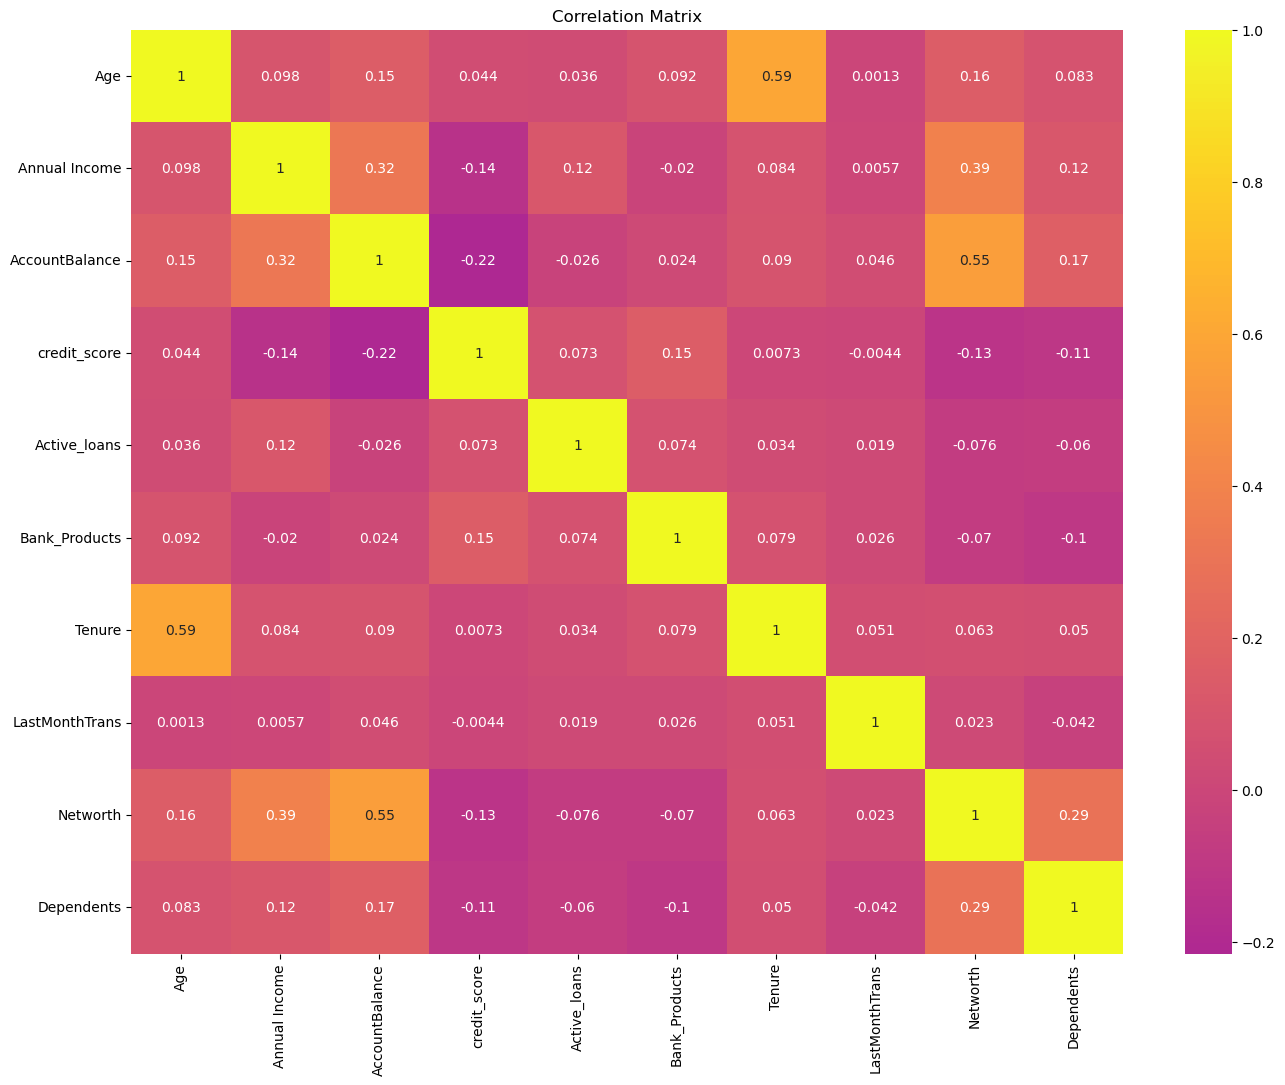

In [153]:
df1 = df_final.copy()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', center=0)
plt.title('Correlation Matrix')
plt.show()


In [154]:
#sns.pairplot(df1)
#plt.show()

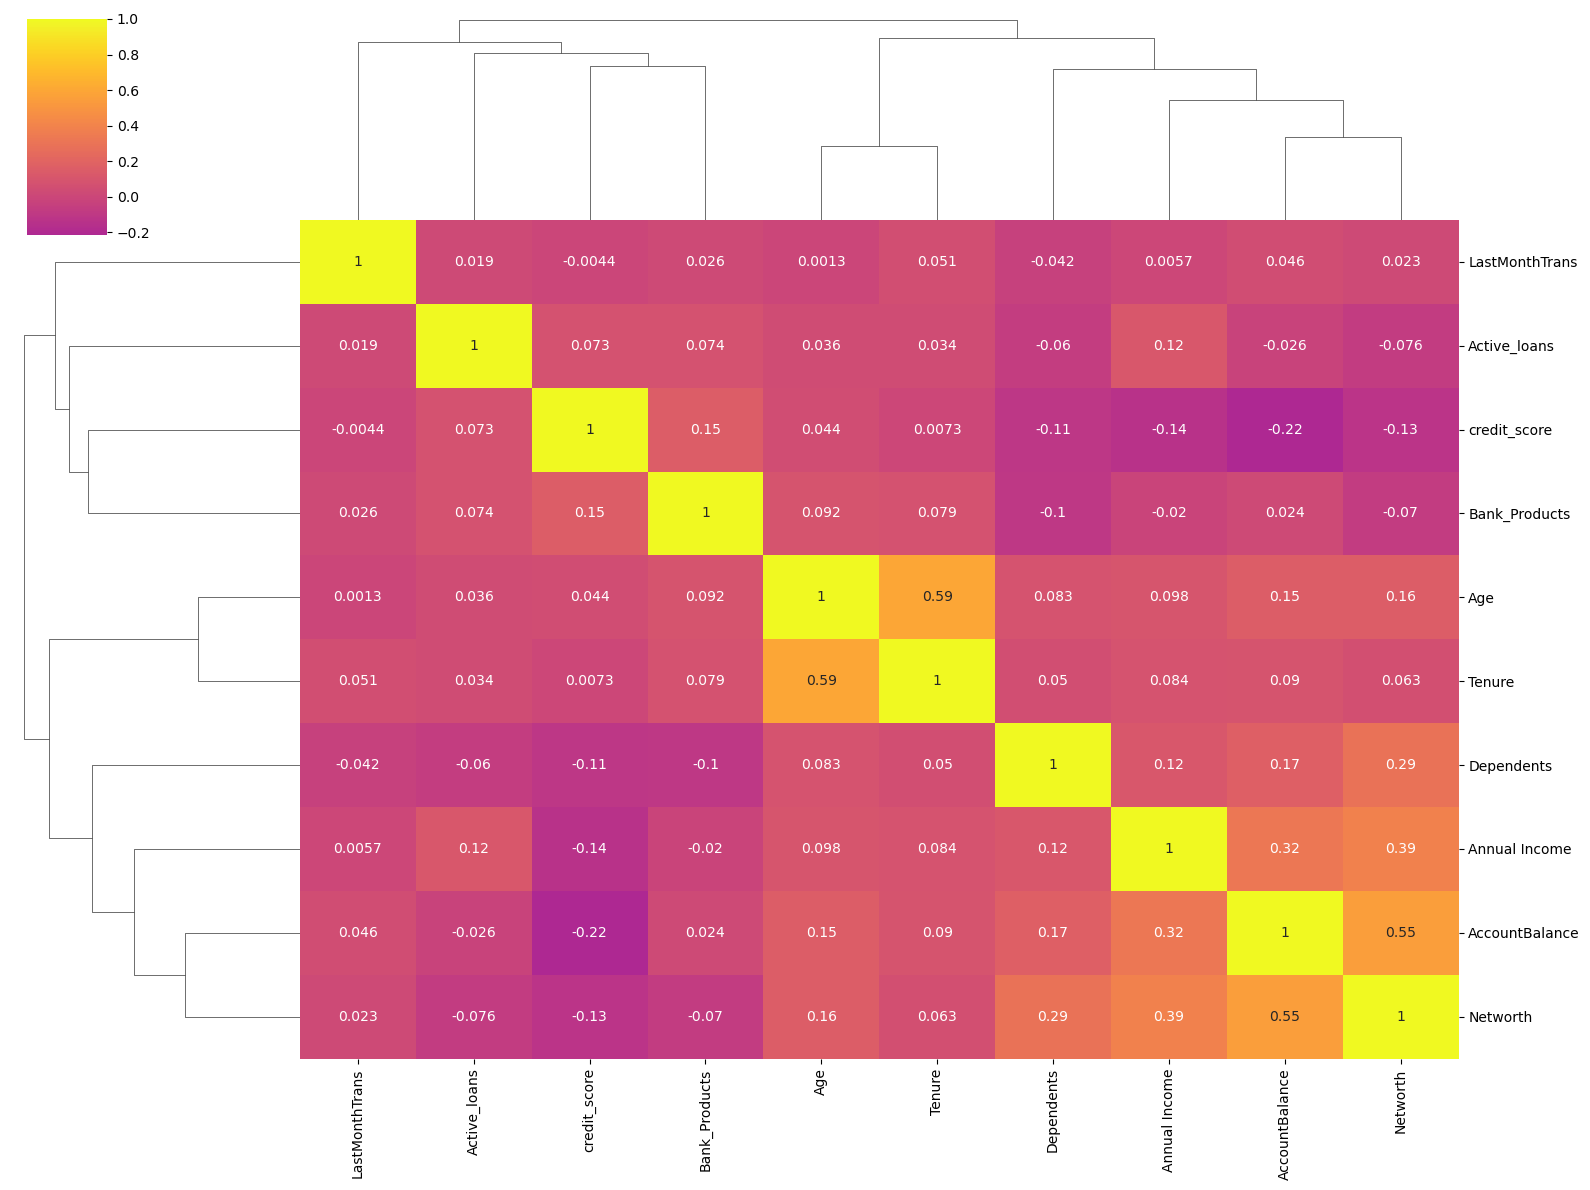

In [155]:
sns.clustermap(corr_matrix, cmap='plasma', annot=True, center=0, figsize=(16, 12))
plt.show()

In [156]:
df_final.dtypes

Age                       int64
Annual Income             int64
AccountBalance            int64
credit_score            float64
Education                object
Active_loans              int64
Bank_Products             int64
Fixed Deposit             int64
Tenure                    int64
LastMonthTrans            int64
Networth                  int64
Dependents                int64
Vehicle                   int64
Occupation_Housewife    float64
Occupation_Other        float64
Occupation_Salaried     float64
Gender_Male             float64
Married_yes             float64
House_rented            float64
dtype: object

In [157]:
from sklearn.preprocessing import OrdinalEncoder

In [158]:
df_final['Education'].unique()


array(['Graduate', 'Under Graduate', 'Post Graduate'], dtype=object)

In [159]:
df_final.shape

(500, 19)

In [160]:
encoder = OrdinalEncoder(categories=[['Under Graduate', 'Graduate', 'Post Graduate']])



In [161]:
df_final['education'] = encoder.fit_transform(df_final[['Education']])



In [162]:
df_final

Age  Annual Income  AccountBalance  credit_score       Education  \
0     45         500100           50000    760.000000        Graduate   
1     49         480000           30000    750.000000        Graduate   
2     37         480000           10000    710.000000  Under Graduate   
3     21         240000            5000    700.000000  Under Graduate   
4     42          35000           12500    800.000000        Graduate   
..   ...            ...             ...           ...             ...   
495   26         223347           17759    674.448695   Post Graduate   
496   29         384000           31590    821.933399  Under Graduate   
497   57         362322            5048    770.625315  Under Graduate   
498   62         168828           15539    847.630622  Under Graduate   
499   65          61057            5600    655.952893        Graduate   

     Active_loans  Bank_Products  Fixed Deposit  Tenure  LastMonthTrans  \
0               2              5              0      11              33   
1               2              3              1      10              23   
2               0              2              1       6              34   
3               1              2              0       2              25   
4               1              2              1       8              56   
..            ...            ...            ...     ...             ...   
495             1              6              0       3              50   
496             3              4              1       1              35   
497             3              2              1       5              55   
498             1              1              0      34              37   
499             0              6              1      15              57   

     Networth  Dependents  Vehicle  Occupation_Housewife  Occupation_Other  \
0      100000           2        1                   0.0               0.0   
1      800087           3        0                   0.0               0.0   
2       30000           4        1                   0.0               0.0   
3      650000           0        0                   0.0               0.0   
4       10000           3        1                   1.0               0.0   
..        ...         ...      ...                   ...               ...   
495    642447           1        1                   0.0               1.0   
496    560076           1        0                   0.0               0.0   
497    609861           1        0                   0.0               1.0   
498     63006           2        0                   0.0               1.0   
499     16371           2        0                   0.0               1.0   

     Occupation_Salaried  Gender_Male  Married_yes  House_rented  education  
0                    1.0          1.0          0.0           1.0        1.0  
1                    1.0          1.0          1.0           0.0        1.0  
2                    1.0          1.0          1.0           1.0        0.0  
3                    1.0          1.0          0.0           0.0        0.0  
4                    0.0          0.0          1.0           0.0        1.0  
..                   ...          ...          ...           ...        ...  
495                  0.0          0.0          0.0           0.0        2.0  
496                  0.0          0.0          0.0           0.0        0.0  
497                  0.0          0.0          0.0           0.0        0.0  
498                  0.0          0.0          0.0           0.0        0.0  
499                  0.0          0.0          0.0           0.0        1.0  

[500 rows x 20 columns]

In [163]:
df_final=df_final.drop('Education',axis=1)

In [164]:

df_final

Age  Annual Income  AccountBalance  credit_score  Active_loans  \
0     45         500100           50000    760.000000             2   
1     49         480000           30000    750.000000             2   
2     37         480000           10000    710.000000             0   
3     21         240000            5000    700.000000             1   
4     42          35000           12500    800.000000             1   
..   ...            ...             ...           ...           ...   
495   26         223347           17759    674.448695             1   
496   29         384000           31590    821.933399             3   
497   57         362322            5048    770.625315             3   
498   62         168828           15539    847.630622             1   
499   65          61057            5600    655.952893             0   

     Bank_Products  Fixed Deposit  Tenure  LastMonthTrans  Networth  \
0                5              0      11              33    100000   
1                3              1      10              23    800087   
2                2              1       6              34     30000   
3                2              0       2              25    650000   
4                2              1       8              56     10000   
..             ...            ...     ...             ...       ...   
495              6              0       3              50    642447   
496              4              1       1              35    560076   
497              2              1       5              55    609861   
498              1              0      34              37     63006   
499              6              1      15              57     16371   

     Dependents  Vehicle  Occupation_Housewife  Occupation_Other  \
0             2        1                   0.0               0.0   
1             3        0                   0.0               0.0   
2             4        1                   0.0               0.0   
3             0        0                   0.0               0.0   
4             3        1                   1.0               0.0   
..          ...      ...                   ...               ...   
495           1        1                   0.0               1.0   
496           1        0                   0.0               0.0   
497           1        0                   0.0               1.0   
498           2        0                   0.0               1.0   
499           2        0                   0.0               1.0   

     Occupation_Salaried  Gender_Male  Married_yes  House_rented  education  
0                    1.0          1.0          0.0           1.0        1.0  
1                    1.0          1.0          1.0           0.0        1.0  
2                    1.0          1.0          1.0           1.0        0.0  
3                    1.0          1.0          0.0           0.0        0.0  
4                    0.0          0.0          1.0           0.0        1.0  
..                   ...          ...          ...           ...        ...  
495                  0.0          0.0          0.0           0.0        2.0  
496                  0.0          0.0          0.0           0.0        0.0  
497                  0.0          0.0          0.0           0.0        0.0  
498                  0.0          0.0          0.0           0.0        0.0  
499                  0.0          0.0          0.0           0.0        1.0  

[500 rows x 19 columns]

In [165]:
df_final.dtypes

Age                       int64
Annual Income             int64
AccountBalance            int64
credit_score            float64
Active_loans              int64
Bank_Products             int64
Fixed Deposit             int64
Tenure                    int64
LastMonthTrans            int64
Networth                  int64
Dependents                int64
Vehicle                   int64
Occupation_Housewife    float64
Occupation_Other        float64
Occupation_Salaried     float64
Gender_Male             float64
Married_yes             float64
House_rented            float64
education               float64
dtype: object

In [166]:
from sklearn.preprocessing import StandardScaler

In [167]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final)

# PCA

In [168]:
from sklearn.decomposition import PCA

In [169]:
pca = PCA(n_components=2)  # Number of components you want to keep
pca_result = pca.fit_transform(scaled_data)

In [170]:
pca_df3 = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])


In [171]:
pca_df3

PC1       PC2
0   -0.718625 -1.318535
1    0.476387 -0.824354
2    0.265659 -2.497131
3   -1.416504 -2.653118
4   -1.396702  1.102242
..        ...       ...
495 -1.571443  0.067163
496 -1.828694 -0.459860
497 -1.011723  0.917508
498 -0.671314  2.024836
499 -0.651326  1.868615

[500 rows x 2 columns]

# K-Means

In [172]:
from sklearn.cluster import KMeans

In [173]:
inertia = []
k_values = range(1, 11)  # Test from 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)

In [174]:
inertia

[2172.251250742661,
 1502.8329937141084,
 886.4112638494672,
 680.1386987091093,
 587.1525106872517,
 509.5054313518882,
 398.2529222834586,
 342.2442960993318,
 315.2396212791552,
 281.27756294518207]

In [175]:
pca_result

array([[-7.18625444e-01, -1.31853483e+00],
       [ 4.76386548e-01, -8.24354265e-01],
       [ 2.65658604e-01, -2.49713114e+00],
       [-1.41650368e+00, -2.65311847e+00],
       [-1.39670201e+00,  1.10224245e+00],
       [ 7.53820069e-01,  2.60454764e-01],
       [ 1.84352842e+00, -5.19035601e-01],
       [ 2.83464032e+00, -1.69878342e+00],
       [-1.32573669e+00, -1.66337570e+00],
       [-2.06240086e+00, -1.71075580e+00],
       [-1.66656330e+00, -2.09454521e+00],
       [ 3.30881170e+00, -3.79437969e-01],
       [ 1.04284829e+00, -6.09953179e-01],
       [ 2.92293476e+00,  3.77185405e-01],
       [-1.51160844e+00, -1.30556406e+00],
       [ 2.71949974e-01, -7.66823372e-01],
       [-1.20808696e+00, -2.49101229e+00],
       [-4.74213629e-01, -1.27501941e+00],
       [-1.24586710e+00, -1.66867300e+00],
       [ 1.38688836e+00, -9.83019750e-01],
       [ 2.65587528e+00, -4.23562573e-01],
       [ 9.73377305e-01, -2.16591535e+00],
       [ 3.57709707e+00, -2.31038334e+00],
       [ 7.

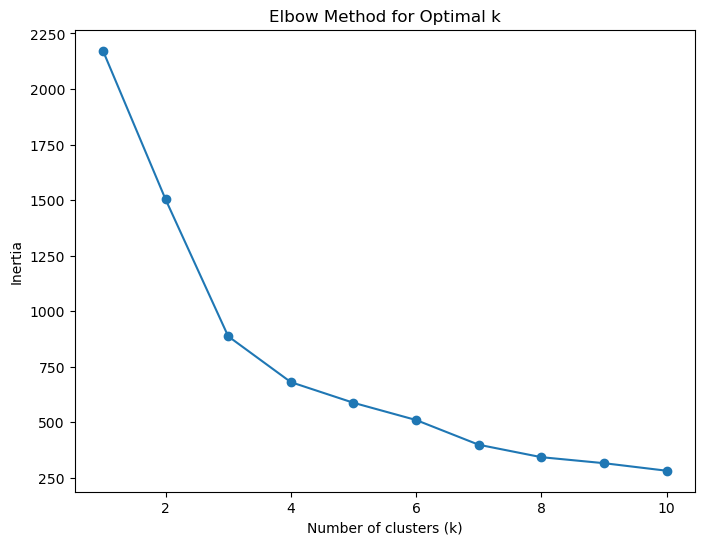

In [176]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [177]:
from sklearn.metrics import silhouette_score
k_values = range(2, 11)  # Start from 2 because silhouette score is not defined for 1 cluster

# Calculate Silhouette Scores
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(pca_result)
    silhouette_avg = silhouette_score(pca_result, clusters)
    silhouette_scores.append(silhouette_avg)


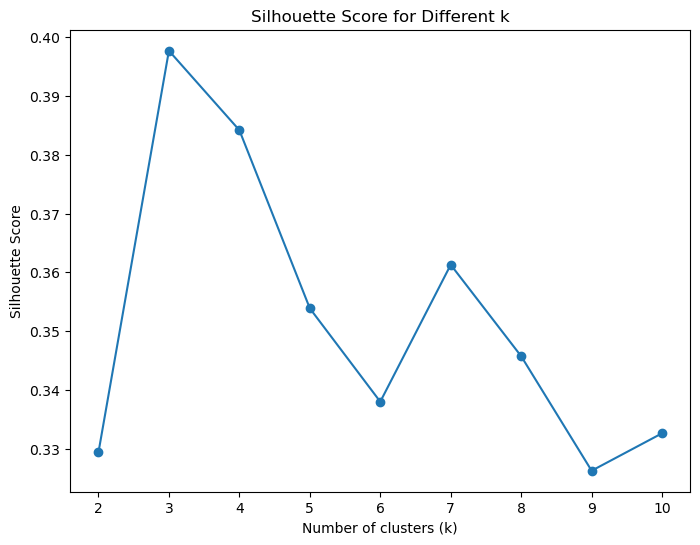

In [178]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [179]:
print("Silhouette Scores:\n", silhouette_scores)

Silhouette Scores:
 [0.3293966416798447, 0.3976765485232148, 0.38416978823961273, 0.3538834931322134, 0.33800993398196116, 0.361292872749512, 0.3457426058574466, 0.32627736694552706, 0.3326443348502811]


In [180]:
from sklearn.metrics import silhouette_score
from kneed import KneeLocator


In [181]:
knee = KneeLocator(range(1, 11),inertia, curve='convex', direction='decreasing')
optimal_k =knee.elbow

In [182]:
optimal_k

3

In [183]:
kmeans_pca = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
pca_df3['Cluster'] = kmeans_pca.fit_predict(pca_df3)

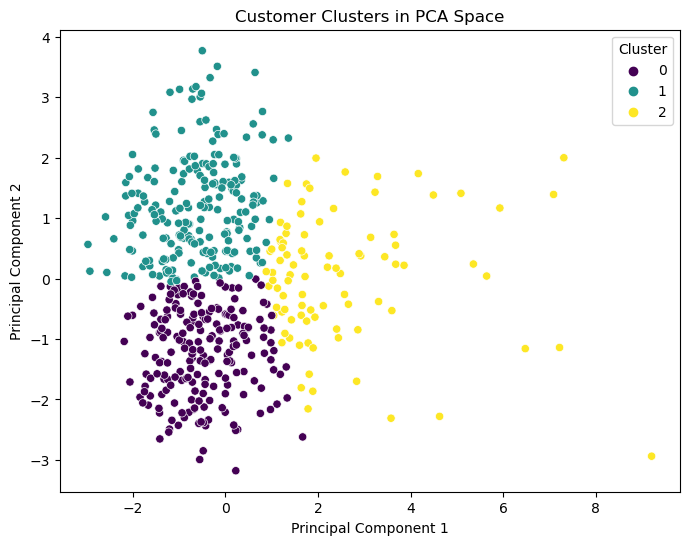

In [184]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df3, palette='viridis')
plt.title('Customer Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [185]:
df_final['Cluster']=pca_df3['Cluster']

In [186]:

cluster_summary = df_final.groupby('Cluster').mean()
print(cluster_summary)

               Age  Annual Income  AccountBalance  credit_score  Active_loans  \
Cluster                                                                         
0        36.861386   3.938821e+05    55623.554455    706.751956      1.346535   
1        53.649038   2.975682e+05    47713.562500    725.778390      1.581731   
2        53.933333   1.135807e+06   499852.577778    665.802600      1.477778   

         Bank_Products  Fixed Deposit     Tenure  LastMonthTrans  \
Cluster                                                            
0             3.014851       0.534653   7.618812       34.861386   
1             3.634615       0.548077  19.576923       36.721154   
2             3.066667       0.544444  18.900000       35.611111   

             Networth  Dependents   Vehicle  Occupation_Housewife  \
Cluster                                                             
0        8.706743e+05    1.633663  0.509901              0.009901   
1        7.010795e+05    1.408654  0.552885   

In [187]:
cluster_mode = df_final.groupby('Cluster').agg(lambda x: x.mode().iloc[0])
print(cluster_mode)

         Age  Annual Income  AccountBalance  credit_score  Active_loans  \
Cluster                                                                   
0         30              0           10000     589.09375             0   
1         53              0            6589     800.00000             3   
2         59         500000          100000     589.09375             0   

         Bank_Products  Fixed Deposit  Tenure  LastMonthTrans  Networth  \
Cluster                                                                   
0                    1              1       2              49    700000   
1                    5              1       5              44     10000   
2                    3              1      15              45   1000000   

         Dependents  Vehicle  Occupation_Housewife  Occupation_Other  \
Cluster                                                                
0                 0        1                   0.0               0.0   
1                 2        1    

In [188]:
df_final.columns


Index(['Age', 'Annual Income', 'AccountBalance', 'credit_score',
       'Active_loans', 'Bank_Products', 'Fixed Deposit', 'Tenure',
       'LastMonthTrans', 'Networth', 'Dependents', 'Vehicle',
       'Occupation_Housewife', 'Occupation_Other', 'Occupation_Salaried',
       'Gender_Male', 'Married_yes', 'House_rented', 'education', 'Cluster'],
      dtype='object')

In [189]:
df_reset = df_final.copy()

In [190]:
df_reset=pd.DataFrame(df_reset)

In [191]:
occupation_df = df_reset.melt(id_vars='Cluster', value_vars=['Occupation_Housewife', 'Occupation_Other', 'Occupation_Salaried'], var_name='Occupation', value_name='Percentage')
df_reset['Gender_Female'] = 1 - df_reset['Gender_Male']
gender_df = df_reset.melt(id_vars='Cluster', value_vars=['Gender_Male','Gender_Female'], var_name='Gender', value_name='Percentage')
df_reset['Single'] = 1 - df_reset['Married_yes']
married_df = df_reset.melt(id_vars='Cluster', value_vars=['Married_yes','Single'], var_name='Married', value_name='Percentage')
df_reset['Owned'] = 1 - df_reset['House_rented']
home_df = df_reset.melt(id_vars='Cluster', value_vars=['House_rented','Owned'], var_name='House', value_name='Percentage')


education_mapping = {0.0: 'Undergraduate', 1.0: 'Graduate', 2.0: 'Post Graduate'}
df_reset['Education_Label'] = df_reset['education'].map(education_mapping)
education_df = df_reset.melt(id_vars='Cluster', value_vars=['Education_Label'], var_name='Education', value_name='Count')



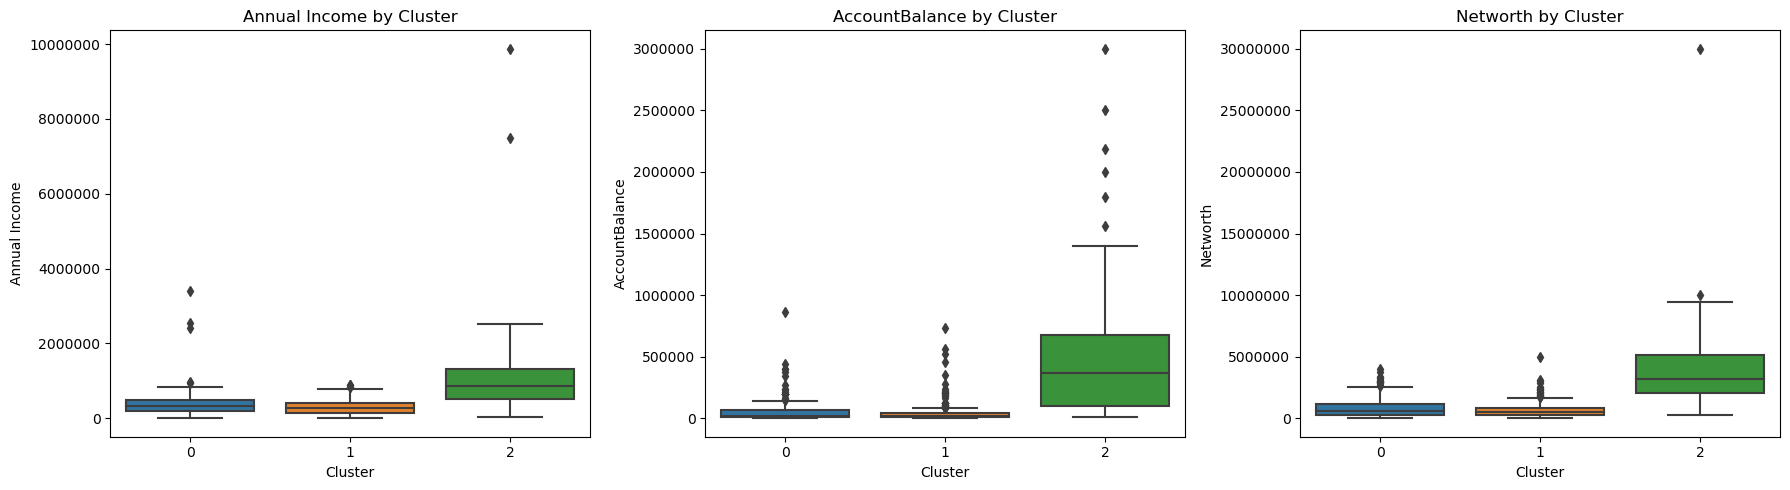

In [192]:
financial_features = ['Annual Income', 'AccountBalance', 'Networth']

plt.figure(figsize=(18, 5))


for i, feature in enumerate(financial_features, 1):
    plt.subplot(1, 3, i)
    plt.ticklabel_format(style='plain')
    #plt.xticks(rotation=45)

    sns.boxplot(x='Cluster', y=feature, data=df_reset)
    plt.title(f'{feature} by Cluster')
plt.tight_layout()

plt.show()

In [193]:
df_reset['Occupation_Business'] = 1 - df_reset[['Occupation_Housewife', 'Occupation_Other', 'Occupation_Salaried']].sum(axis=1)
occupation_df = df_reset[['Cluster', 'Occupation_Housewife', 'Occupation_Other', 'Occupation_Salaried', 'Occupation_Business']]
occupation_df = occupation_df.melt(id_vars='Cluster', var_name='Occupation', value_name='Percentage')

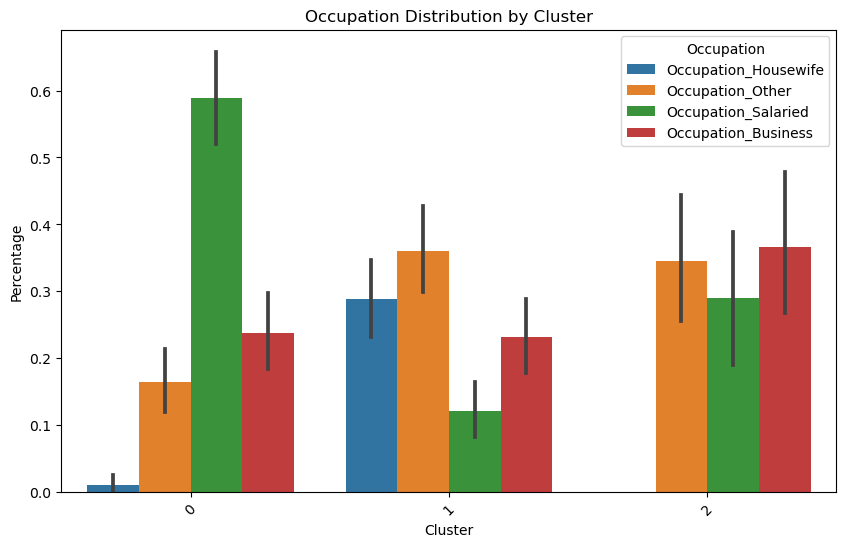

In [194]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Percentage', hue='Occupation', data=occupation_df)
plt.title('Occupation Distribution by Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  
plt.show()

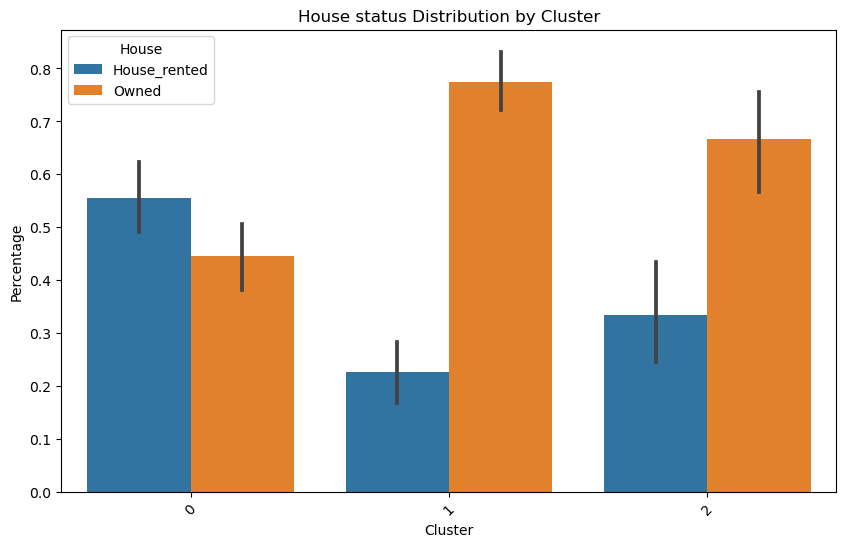

In [195]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Percentage', hue='House', data=home_df)
plt.title('House status Distribution by Cluster')
plt.ylabel('Percentage')
plt.xticks(rotation=45)  
plt.show()

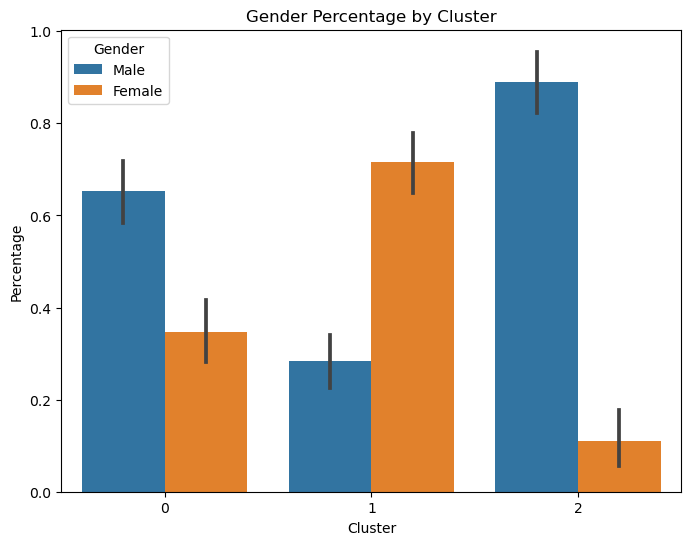

In [196]:
gender_df['Gender'] = gender_df['Gender'].str.replace('Gender_', '')
plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Percentage', hue='Gender', data=gender_df)
plt.title('Gender Percentage by Cluster')
plt.ylabel('Percentage')
plt.show()


In [197]:
df_reset['education'].value_counts()


education
1.0    185
0.0    161
2.0    154
Name: count, dtype: int64

In [198]:
print(education_df.head())

   Cluster        Education          Count
0        0  Education_Label       Graduate
1        0  Education_Label       Graduate
2        0  Education_Label  Undergraduate
3        0  Education_Label  Undergraduate
4        1  Education_Label       Graduate


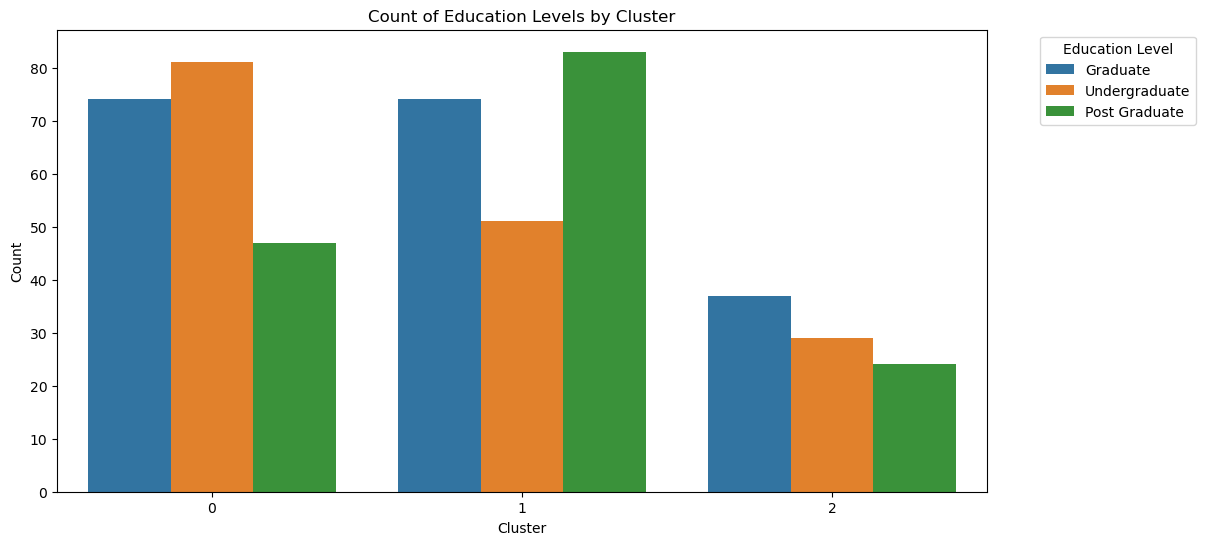

In [199]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Education_Label', data=df_reset)
plt.title('Count of Education Levels by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


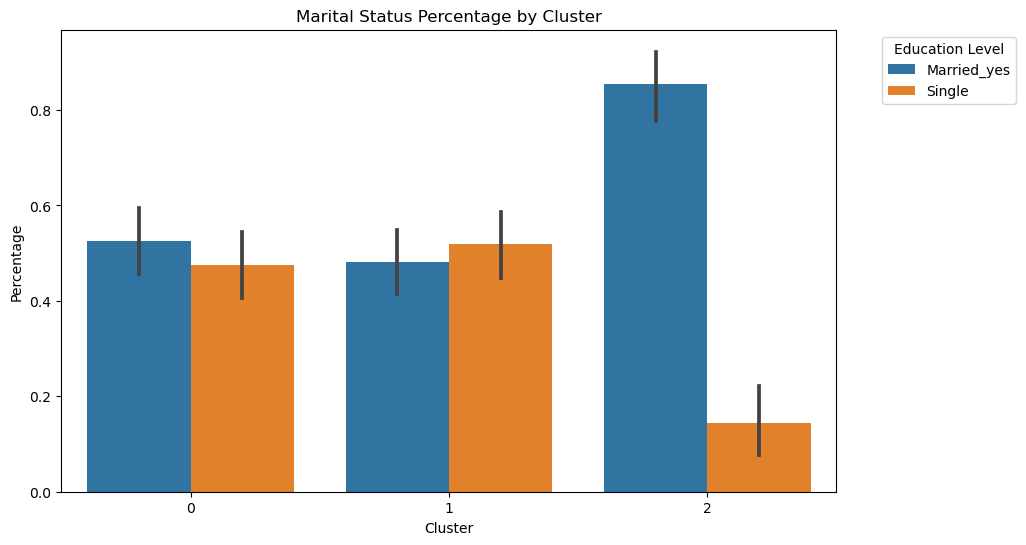

In [200]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Percentage', hue='Married', data=married_df)
plt.title('Marital Status Percentage by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

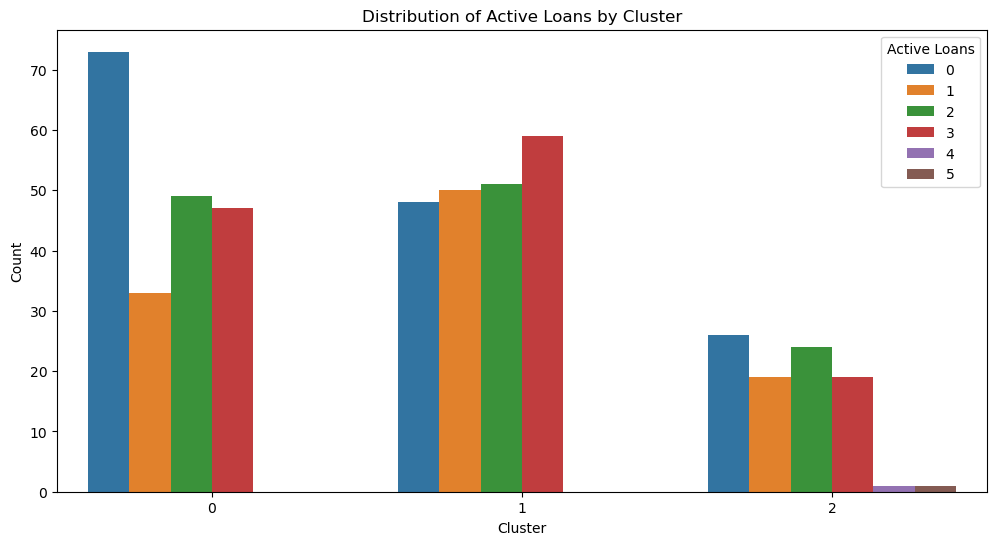

In [201]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Cluster', hue='Active_loans', data=df_reset)
plt.title('Distribution of Active Loans by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Active Loans')
plt.show()

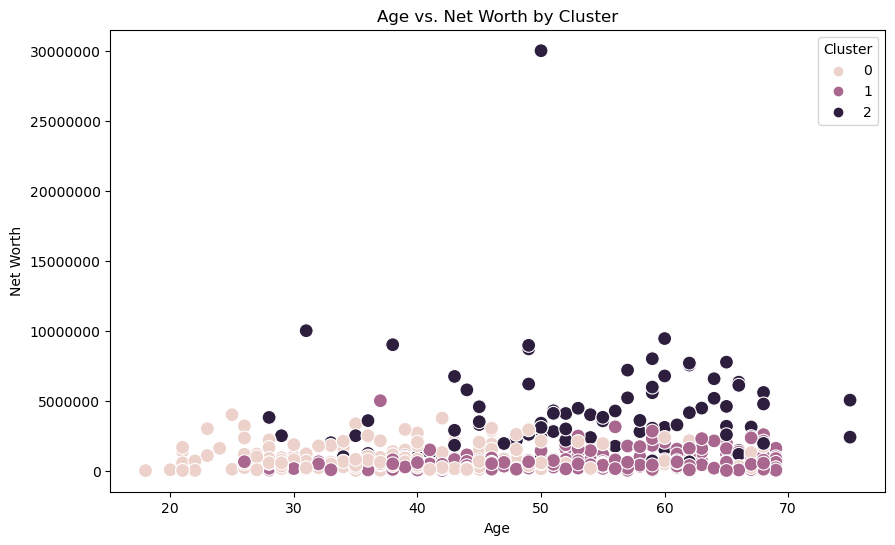

In [202]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Networth', hue='Cluster', data=df_reset, s=100)
plt.ticklabel_format(style='plain')
plt.title('Age vs. Net Worth by Cluster')
plt.xlabel('Age')
plt.ylabel('Net Worth')
plt.show()

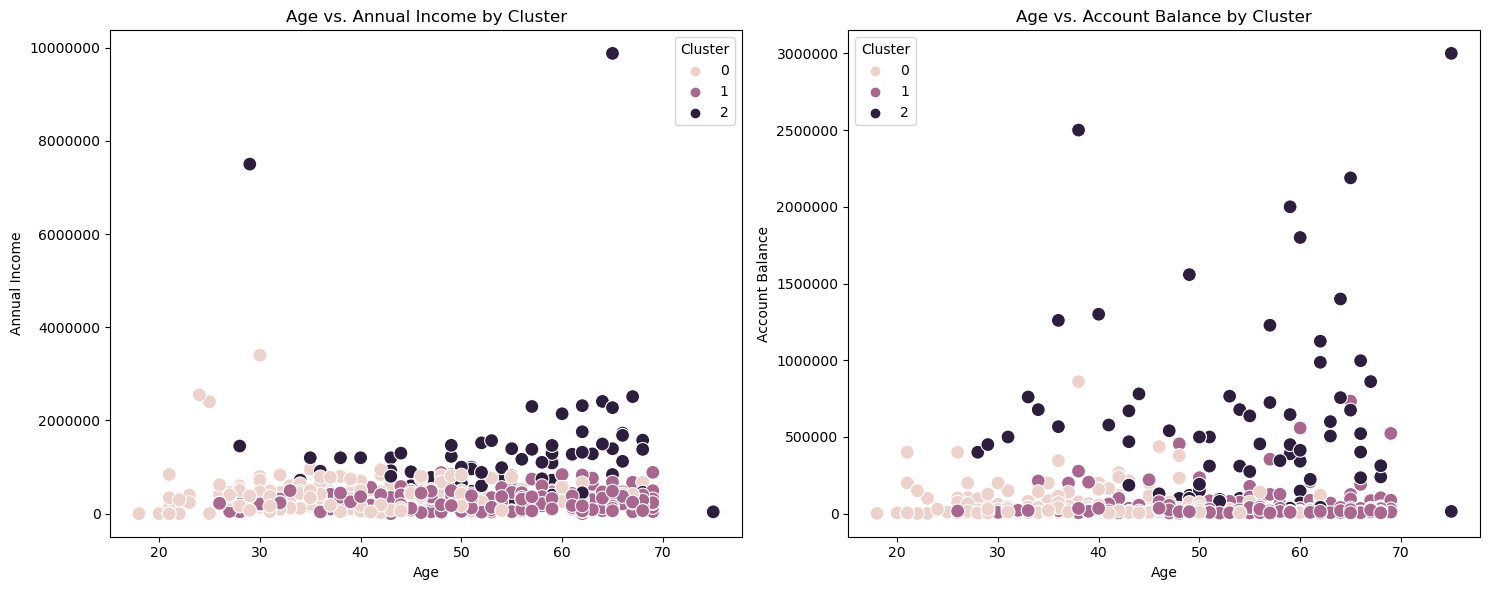

In [203]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1) 
sns.scatterplot(x='Age', y='Annual Income', hue='Cluster', data=df_reset, s=100)
plt.ticklabel_format(style='plain')  
plt.title('Age vs. Annual Income by Cluster')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.scatterplot(x='Age', y='AccountBalance', hue='Cluster', data=df_reset, s=100)
plt.ticklabel_format(style='plain')  # To avoid scientific notation
plt.title('Age vs. Account Balance by Cluster')
plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.tight_layout()
plt.show()

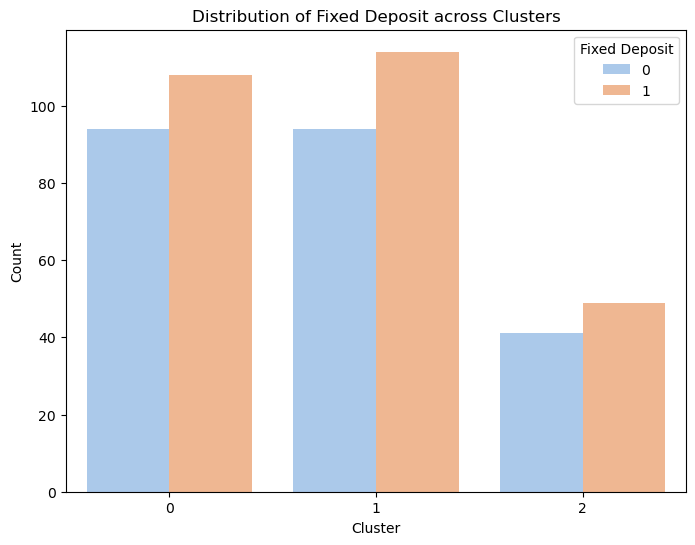

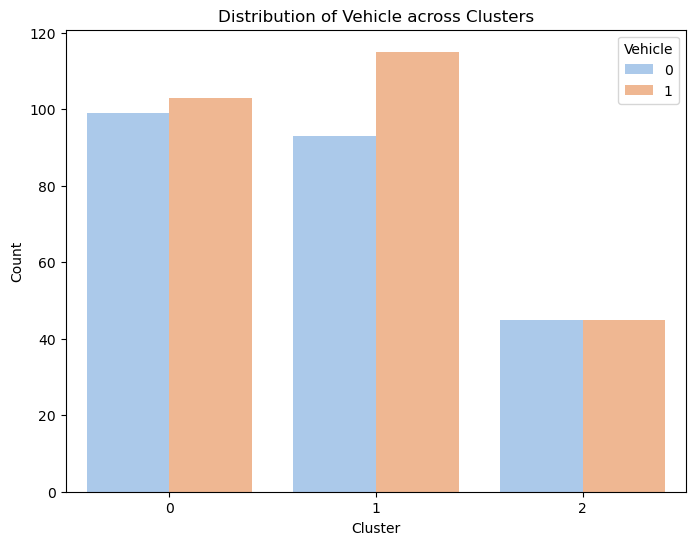

In [204]:
binary_columns = ['Fixed Deposit', 'Vehicle']
for column in binary_columns:
    plt.figure(figsize=(8, 6))   
    sns.countplot(x='Cluster', hue=column, data=df_final, palette='pastel')
    plt.title(f'Distribution of {column} across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.show()

<Axes: xlabel='Cluster'>

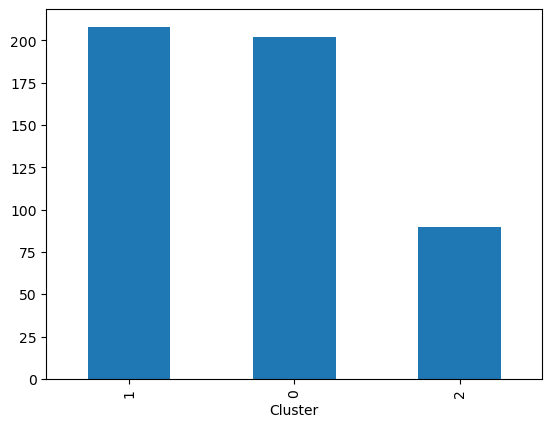

In [205]:
df_final['Cluster'].value_counts().plot(kind='bar')

In [206]:
df_reset

Age  Annual Income  AccountBalance  credit_score  Active_loans  \
0     45         500100           50000    760.000000             2   
1     49         480000           30000    750.000000             2   
2     37         480000           10000    710.000000             0   
3     21         240000            5000    700.000000             1   
4     42          35000           12500    800.000000             1   
..   ...            ...             ...           ...           ...   
495   26         223347           17759    674.448695             1   
496   29         384000           31590    821.933399             3   
497   57         362322            5048    770.625315             3   
498   62         168828           15539    847.630622             1   
499   65          61057            5600    655.952893             0   

     Bank_Products  Fixed Deposit  Tenure  LastMonthTrans  Networth  ...  \
0                5              0      11              33    100000  ...   
1                3              1      10              23    800087  ...   
2                2              1       6              34     30000  ...   
3                2              0       2              25    650000  ...   
4                2              1       8              56     10000  ...   
..             ...            ...     ...             ...       ...  ...   
495              6              0       3              50    642447  ...   
496              4              1       1              35    560076  ...   
497              2              1       5              55    609861  ...   
498              1              0      34              37     63006  ...   
499              6              1      15              57     16371  ...   

     Gender_Male  Married_yes  House_rented  education  Cluster  \
0            1.0          0.0           1.0        1.0        0   
1            1.0          1.0           0.0        1.0        0   
2            1.0          1.0           1.0        0.0        0   
3            1.0          0.0           0.0        0.0        0   
4            0.0          1.0           0.0        1.0        1   
..           ...          ...           ...        ...      ...   
495          0.0          0.0           0.0        2.0        1   
496          0.0          0.0           0.0        0.0        0   
497          0.0          0.0           0.0        0.0        1   
498          0.0          0.0           0.0        0.0        1   
499          0.0          0.0           0.0        1.0        1   

     Gender_Female  Single  Owned  Education_Label  Occupation_Business  
0              0.0     1.0    0.0         Graduate                  0.0  
1              0.0     0.0    1.0         Graduate                  0.0  
2              0.0     0.0    0.0    Undergraduate                  0.0  
3              0.0     1.0    1.0    Undergraduate                  0.0  
4              1.0     0.0    1.0         Graduate                  0.0  
..             ...     ...    ...              ...                  ...  
495            1.0     1.0    1.0    Post Graduate                  0.0  
496            1.0     1.0    1.0    Undergraduate                  1.0  
497            1.0     1.0    1.0    Undergraduate                  0.0  
498            1.0     1.0    1.0    Undergraduate                  0.0  
499            1.0     1.0    1.0         Graduate                  0.0  

[500 rows x 25 columns]

# DBSCN clustering

In [207]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [208]:
df_final1=df_final.copy()

In [209]:
dbscan = DBSCAN(eps=0.5, min_samples=2)
df_final1['Cluster'] = dbscan.fit_predict(pca_result)

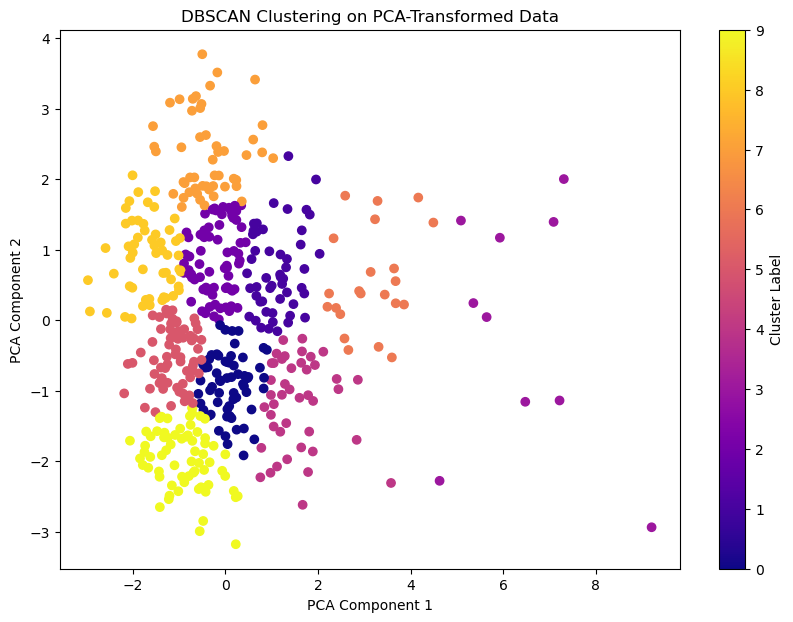

In [210]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='plasma')
plt.title('DBSCAN Clustering on PCA-Transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [211]:
cluster_summary = df_final1.groupby('Cluster').mean()
print(cluster_summary)

               Age  Annual Income  AccountBalance  credit_score  Active_loans  \
Cluster                                                                         
-1       52.615385   2.163204e+06    1.001998e+06    576.803458      1.384615   
 0       46.394904   4.038673e+05    8.279701e+04    711.694324      1.471338   
 1       46.500000   1.069812e+06    4.053850e+05    699.430250      1.000000   
 2       57.125000   1.430462e+06    7.429842e+05    673.762583      1.625000   
 3       61.500000   1.564436e+06    1.699720e+06    692.602841      0.000000   
 4       65.500000   2.003849e+06    8.085915e+05    635.134077      2.500000   
 5       59.500000   2.309000e+06    1.176240e+06    748.563831      1.500000   

         Bank_Products  Fixed Deposit     Tenure  LastMonthTrans  \
Cluster                                                            
-1            2.538462       0.461538  21.538462       43.692308   
 0            3.290870       0.535032  14.231423       35.537155  

In [212]:
labels = dbscan.labels_

In [213]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f'Number of clusters formed: {n_clusters}')

Number of clusters formed: 6


<Axes: xlabel='Cluster'>

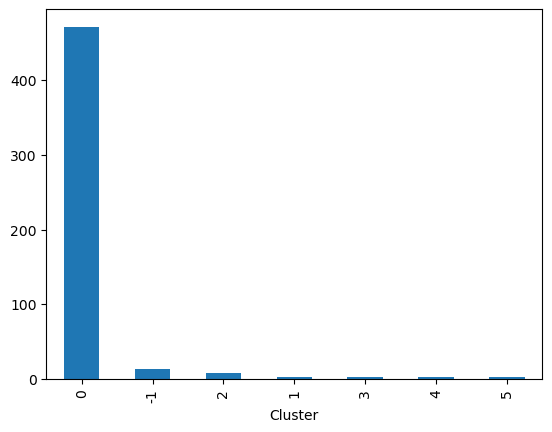

In [214]:
df_final1['Cluster'].value_counts().plot(kind='bar')

In [215]:
'''df_final['Cluster'] = clusters

# Plot pair plots
sns.pairplot(df_final, hue='Cluster', palette='viridis', diag_kind='kde')
plt.title('Pair Plot of Features Colored by Cluster')
plt.show()'''

"df_final['Cluster'] = clusters\n\n# Plot pair plots\nsns.pairplot(df_final, hue='Cluster', palette='viridis', diag_kind='kde')\nplt.title('Pair Plot of Features Colored by Cluster')\nplt.show()"

In [216]:
df_final.isnull().sum()

Age                     0
Annual Income           0
AccountBalance          0
credit_score            0
Active_loans            0
Bank_Products           0
Fixed Deposit           0
Tenure                  0
LastMonthTrans          0
Networth                0
Dependents              0
Vehicle                 0
Occupation_Housewife    0
Occupation_Other        0
Occupation_Salaried     0
Gender_Male             0
Married_yes             0
House_rented            0
education               0
Cluster                 0
dtype: int64

# KNN

In [217]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [218]:
X_train, X_test, y_train, y_test = train_test_split(pca_df3, pca_df3['Cluster'], test_size=0.3, random_state=42)


In [219]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [220]:
y_pred = knn.predict(X_test)

In [221]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2,
       1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 2, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0,
       2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2,
       0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 1, 0], dtype=int32)

In [222]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [223]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        31

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [224]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[60  0  0]
 [ 0 59  0]
 [ 0  0 31]]


In [225]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Score: {cv_scores.mean():.2f}')

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Cross-Validation Score: 1.00


In [226]:
X = df_final.drop(columns=['Cluster'])
Y=df_final['Cluster']

In [227]:
scaler1=StandardScaler()
#scaler = StandardScaler()
X2 = scaler.fit_transform(X)
X2=pd.DataFrame(X2)


## 

In [228]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.30, random_state=42)


In [229]:
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train1, y_train1)

KNeighborsClassifier(n_neighbors=3)

In [230]:
y_pred1 = knn1.predict(X_test1)

In [231]:
accuracy1 = accuracy_score(y_test1, y_pred1)
print(f'Accuracy: {accuracy1:.2f}')

Accuracy: 0.56


In [232]:
print('Classification Report:')
print(classification_report(y_test1, y_pred1))

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52        60
           1       0.52      0.54      0.53        59
           2       0.77      0.65      0.70        31

    accuracy                           0.56       150
   macro avg       0.60      0.57      0.59       150
weighted avg       0.57      0.56      0.56       150



In [233]:
cv_scores = cross_val_score(knn1, X_train1, y_train1, cv=10)  # 5-fold cross-validation

# Print the results
print(f"KNN Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

KNN Cross-Validation Scores: [0.42857143 0.51428571 0.54285714 0.51428571 0.45714286 0.51428571
 0.62857143 0.42857143 0.57142857 0.48571429]
Mean Accuracy: 0.5085714285714286
Standard Deviation: 0.05965889433663172


# Random forest

In [234]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Assuming X_train, y_train are your features and labels
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train1, y_train1)
predictions = model.predict(X_test1)

In [235]:
X_test1

Age  Annual Income  AccountBalance  credit_score  Active_loans  \
361   52         393684            8384    769.866410             2   
73    27         245000           10000    700.000000             0   
374   59         287769            7816    641.684379             1   
155   43         168045           12322    632.848663             0   
104   36         657890          345676    760.518535             0   
..   ...            ...             ...           ...           ...   
266   31          80826            6510    741.445860             3   
23    42         840000          120000    798.000000             0   
222   62        2317797         1124180    695.723273             1   
261   57         228238            5422    743.653801             2   
426   26         226485            9967    759.576146             1   

     Bank_Products  Fixed Deposit  Tenure  LastMonthTrans  Networth  \
361              1              0       2              11    356907   
73               2              0       3              41    400567   
374              3              1      12              20     28758   
155              6              1      20              52    879980   
104              6              0       9              24    409662   
..             ...            ...     ...             ...       ...   
266              4              0      12              53    429411   
23               5              1      16              54    900000   
222              2              1      40              14   7689841   
261              4              1      16              51    405698   
426              6              1       2              12    217835   

     Dependents  Vehicle  Occupation_Housewife  Occupation_Other  \
361           2        1                   0.0               0.0   
73            2        1                   0.0               0.0   
374           4        0                   1.0               0.0   
155           2        0                   0.0               1.0   
104           2        1                   0.0               0.0   
..          ...      ...                   ...               ...   
266           0        1                   0.0               0.0   
23            4        1                   0.0               0.0   
222           1        1                   0.0               0.0   
261           0        0                   1.0               0.0   
426           0        1                   0.0               0.0   

     Occupation_Salaried  Gender_Male  Married_yes  House_rented  education  
361                  1.0          1.0          0.0           0.0        2.0  
73                   1.0          1.0          1.0           1.0        1.0  
374                  0.0          0.0          1.0           0.0        1.0  
155                  0.0          1.0          0.0           1.0        2.0  
104                  1.0          0.0          1.0           0.0        2.0  
..                   ...          ...          ...           ...        ...  
266                  0.0          0.0          0.0           1.0        0.0  
23                   0.0          1.0          1.0           1.0        0.0  
222                  0.0          1.0          0.0           0.0        1.0  
261                  0.0          0.0          0.0           0.0        0.0  
426                  1.0          1.0          0.0           0.0        1.0  

[150 rows x 19 columns]

In [236]:
predictions

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0, 0, 2,
       1, 2, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       2, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 2,
       0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 1, 0], dtype=int32)

In [237]:
accuracy2 = accuracy_score(y_test1, predictions)
print(f'Accuracy: {accuracy2:.2f}')

Accuracy: 0.91


In [238]:
print('Classification Report:')
print(classification_report(y_test1, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        60
           1       0.89      0.97      0.93        59
           2       0.92      0.77      0.84        31

    accuracy                           0.91       150
   macro avg       0.91      0.89      0.90       150
weighted avg       0.91      0.91      0.91       150



In [239]:
cv_scores = cross_val_score(model, X_train1, y_train1, cv=5)  # 5-fold cross-validation

# Print the results
print(f"Random Forest Cross-Validation Scores: {cv_scores}")

print(f"Mean Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

Random Forest Cross-Validation Scores: [0.88571429 0.9        0.9        0.8        0.91428571]
Mean Accuracy: 0.8800000000000001
Standard Deviation: 0.04100771455544948


# XGBoost

In [240]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
495    1
496    0
497    1
498    1
499    1
Name: Cluster, Length: 500, dtype: int32

In [241]:
from xgboost import XGBClassifier

model1 = XGBClassifier(n_estimators=100, learning_rate=0.05)
model1.fit(X_train1, y_train1)
predictions1 = model1.predict(X_test1)

In [242]:
accuracy3 = accuracy_score(y_test1, predictions1)
print(f'Accuracy: {accuracy3:.2f}')

Accuracy: 0.89


In [243]:
cv_scores = cross_val_score(model1, X_train1, y_train1, cv=7)  # 5-fold cross-validation

# Print the results
print(f"Random Forest Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation: {cv_scores.std()}")

Random Forest Cross-Validation Scores: [0.82 0.9  0.86 0.86 0.82 0.84 0.88]
Mean Accuracy: 0.8542857142857142
Standard Deviation: 0.02770102775666476


# Decision tree

In [244]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [245]:
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train1, y_train1)

DecisionTreeClassifier(random_state=42)

In [246]:
dt = model3.predict(X_test1)

# Accuracy
accuracy4 = accuracy_score(y_test1, dt)
print(f'Accuracy: {accuracy4:.2f}')

# Classification Report
print("Classification Report:\n", classification_report(y_test1, dt))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test1, dt))

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        60
           1       0.84      0.83      0.84        59
           2       0.70      0.61      0.66        31

    accuracy                           0.78       150
   macro avg       0.77      0.75      0.76       150
weighted avg       0.78      0.78      0.78       150

Confusion Matrix:
 [[49  6  5]
 [ 7 49  3]
 [ 9  3 19]]


In [247]:
cv_scores4 = cross_val_score(model3, X_test1, y_test1, cv=5)  # Using 5-fold cross-validation
print(f'Cross-Validation Scores: {cv_scores4}')
print(f'Mean Accuracy: {cv_scores4.mean():.2f}')

Cross-Validation Scores: [0.86666667 0.76666667 0.9        0.83333333 0.76666667]
Mean Accuracy: 0.83


In [248]:
df_concat = pd.concat([df1, df_final['Cluster']], axis=1)


In [249]:
Y

0      0
1      0
2      0
3      0
4      1
      ..
495    1
496    0
497    1
498    1
499    1
Name: Cluster, Length: 500, dtype: int32

In [250]:
df_concat

Age  Annual Income  AccountBalance  credit_score       Education  \
0     45         500100           50000    760.000000        Graduate   
1     49         480000           30000    750.000000        Graduate   
2     37         480000           10000    710.000000  Under Graduate   
3     21         240000            5000    700.000000  Under Graduate   
4     42          35000           12500    800.000000        Graduate   
..   ...            ...             ...           ...             ...   
495   26         223347           17759    674.448695   Post Graduate   
496   29         384000           31590    821.933399  Under Graduate   
497   57         362322            5048    770.625315  Under Graduate   
498   62         168828           15539    847.630622  Under Graduate   
499   65          61057            5600    655.952893        Graduate   

     Active_loans  Bank_Products  Fixed Deposit  Tenure  LastMonthTrans  \
0               2              5              0      11              33   
1               2              3              1      10              23   
2               0              2              1       6              34   
3               1              2              0       2              25   
4               1              2              1       8              56   
..            ...            ...            ...     ...             ...   
495             1              6              0       3              50   
496             3              4              1       1              35   
497             3              2              1       5              55   
498             1              1              0      34              37   
499             0              6              1      15              57   

     Networth  Dependents  Vehicle  Occupation_Housewife  Occupation_Other  \
0      100000           2        1                   0.0               0.0   
1      800087           3        0                   0.0               0.0   
2       30000           4        1                   0.0               0.0   
3      650000           0        0                   0.0               0.0   
4       10000           3        1                   1.0               0.0   
..        ...         ...      ...                   ...               ...   
495    642447           1        1                   0.0               1.0   
496    560076           1        0                   0.0               0.0   
497    609861           1        0                   0.0               1.0   
498     63006           2        0                   0.0               1.0   
499     16371           2        0                   0.0               1.0   

     Occupation_Salaried  Gender_Male  Married_yes  House_rented  Cluster  
0                    1.0          1.0          0.0           1.0        0  
1                    1.0          1.0          1.0           0.0        0  
2                    1.0          1.0          1.0           1.0        0  
3                    1.0          1.0          0.0           0.0        0  
4                    0.0          0.0          1.0           0.0        1  
..                   ...          ...          ...           ...      ...  
495                  0.0          0.0          0.0           0.0        1  
496                  0.0          0.0          0.0           0.0        0  
497                  0.0          0.0          0.0           0.0        1  
498                  0.0          0.0          0.0           0.0        1  
499                  0.0          0.0          0.0           0.0        1  

[500 rows x 20 columns]

In [251]:
df_concat.to_csv('data_with_clusters.csv', index=False)

In [252]:
import pickle

In [253]:
with open('knn2.pkl', 'wb') as file:
    pickle.dump(knn1, file)

In [254]:

with open('scaler1.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [255]:
with open('encoder1.pkl', 'wb') as f:
    pickle.dump(encoder1, f)

In [256]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [257]:
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [258]:
with open('rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [259]:
with open('encoder2.pkl', 'wb') as f:
    pickle.dump(encoder1, f)

In [260]:
with open('scaler2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [261]:
with open('pca1.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [262]:
with open('rf1.2.pkl', 'wb') as file:
    pickle.dump(model, file)

In [263]:
with open('encoder3.pkl', 'wb') as f:
    pickle.dump(encoder1, f)

In [264]:
with open('scaler3.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [265]:
with open('pca2.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [266]:
with open('encoderord.pkl', 'wb') as f:
    pickle.dump(encoder, f)